# **An√°lise de Vendas da Adidas - 2020 e 2021**

Este projeto analisa o desempenho de vendas da Adidas nos anos de 2020 e 2021, com foco em identificar tend√™ncias de consumo e os impactos da pandemia de COVID-19 no varejo.

A crise sanit√°ria de 2020 afetou significativamente o comportamento dos consumidores e a opera√ß√£o das empresas. No primeiro semestre, restri√ß√µes e fechamentos de lojas f√≠sicas reduziram as vendas presenciais, enquanto as compras online ganharam for√ßa. O objetivo deste estudo √© compreender essas mudan√ßas e avaliar como as vendas evolu√≠ram ao longo do per√≠odo.

### **Etapas do Projeto**

1. **Importa√ß√£o de Dados**: Carregamento e pr√©-processamento dos dados.
2. **Tratamento de Dados**: Limpeza e organiza√ß√£o para an√°lise
3. **An√°lise Explorat√≥ria de Dados (EDA)**: Visualiza√ß√£o e identifica√ß√£o de padr√µes
4. **An√°lise Descritiva (Estat√≠stica)**: Estat√≠sticas e testes para validar hip√≥teses

Os dados foram obtidos no Kaggle e est√£o armazenados em um arquivo Excel, contendo informa√ß√µes detalhadas sobre vendas da Adidas.

### **Ferramentas Utilizadas**

- **Pandas e Numpy**: Manipula√ß√£o e tratamento dos dados.
- **Seaborn e Matplotlib**: Visualiza√ß√£o gr√°fica.
- **Scipy**: Testes estat√≠sticos e an√°lises avan√ßadas.
- **Cycler**: Personaliza√ß√£o de cores nos gr√°ficos.
- **Scikit-learn (sklearn.preprocessing)** ‚Äì Padroniza√ß√£o e normaliza√ß√£o dos dados para modelagem estat√≠stica e machine learning.  

In [1]:
# Importa√ß√£o das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from auxiliares import composicao_histograma_boxplot
from auxiliares import tabela_distribuicao_frequencias
from cycler import cycler
from matplotlib.ticker import PercentFormatter
from scipy.interpolate import interp1d
from scipy.stats import chi2_contingency
from scipy.stats import linregress
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# Defini√ß√£o das paletas de cores
cores = plt.get_cmap('Accent').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

DADOS = r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\dados\adidas_us_sales_datasets.xlsx"
df_adidas = pd.read_excel(DADOS)

df_adidas.head()

Unnamed: 0   Unnamed: 1             Unnamed: 2           Unnamed: 3  \
0         NaN          NaN  Adidas Sales Database                  NaN   
1         NaN          NaN                    NaN                  NaN   
2         NaN          NaN                    NaN                  NaN   
3         NaN     Retailer            Retailer ID         Invoice Date   
4         NaN  Foot Locker                1185732  2020-01-01 00:00:00   

  Unnamed: 4 Unnamed: 5 Unnamed: 6             Unnamed: 7      Unnamed: 8  \
0        NaN        NaN        NaN                    NaN             NaN   
1        NaN        NaN        NaN                    NaN             NaN   
2        NaN        NaN        NaN                    NaN             NaN   
3     Region      State       City                Product  Price per Unit   
4  Northeast   New York   New York  Men's Street Footwear              50   

   Unnamed: 9  Unnamed: 10       Unnamed: 11       Unnamed: 12   Unnamed: 13  
0         NaN          NaN               NaN               NaN           NaN  
1         NaN          NaN               NaN               NaN           NaN  
2         NaN          NaN               NaN               NaN           NaN  
3  Units Sold  Total Sales  Operating Profit  Operating Margin  Sales Method  
4        1200       600000            300000               0.5      In-store

### **Pr√©-processamento e Limpeza**

Antes da an√°lise, foi necess√°rio realizar algumas transforma√ß√µes para estruturar melhor os dados:

1. **Ajuste do Cabe√ßalho** ‚Äì A linha 3 do arquivo continha os nomes corretos das colunas, ent√£o ela foi definida como cabe√ßalho do DataFrame.
2. **Remo√ß√£o de Linhas N√£o Relevantes** ‚Äì Linhas anteriores ao cabe√ßalho e outras informa√ß√µes desnecess√°rias foram eliminadas.
3. **Exclus√£o de Colunas Vazias** ‚Äì Colunas contendo apenas valores NaN foram removidas.
4. **Remo√ß√£o da Coluna ‚ÄòRetailer ID‚Äô** ‚Äì Essa coluna n√£o era relevante para a an√°lise e foi descartada.
5. **Convers√£o de Datas** ‚Äì A coluna Invoice Date foi convertida para o formato YYYY-MM-DD, garantindo consist√™ncia para an√°lises temporais.

In [2]:
# Definir a linha 3 como cabe√ßalho (nomes das colunas)
df_adidas.columns = df_adidas.iloc[3]

# Remover as linhas antigas, incluindo a nova linha de cabe√ßalho
df_adidas = df_adidas.iloc[4:].reset_index(drop=True)

In [3]:
df_adidas.head()

3  NaN     Retailer Retailer ID         Invoice Date     Region     State  \
0  NaN  Foot Locker     1185732  2020-01-01 00:00:00  Northeast  New York   
1  NaN  Foot Locker     1185732  2020-01-02 00:00:00  Northeast  New York   
2  NaN  Foot Locker     1185732  2020-01-03 00:00:00  Northeast  New York   
3  NaN  Foot Locker     1185732  2020-01-04 00:00:00  Northeast  New York   
4  NaN  Foot Locker     1185732  2020-01-05 00:00:00  Northeast  New York   

3      City                    Product Price per Unit Units Sold Total Sales  \
0  New York      Men's Street Footwear             50       1200      600000   
1  New York    Men's Athletic Footwear             50       1000      500000   
2  New York    Women's Street Footwear             40       1000      400000   
3  New York  Women's Athletic Footwear             45        850      382500   
4  New York              Men's Apparel             60        900      540000   

3 Operating Profit Operating Margin Sales Method  
0           300000              0.5     In-store  
1           150000              0.3     In-store  
2           140000             0.35     In-store  
3           133875             0.35     In-store  
4           162000              0.3     In-store

In [4]:
# Remove colunas onde todos os valores s√£o NaN
df_adidas = df_adidas.dropna(axis=1, how="all") 
df_adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [5]:
df_adidas = df_adidas.drop(["Retailer ID"], axis=1)

In [6]:
df_adidas["Invoice Date"] = pd.to_datetime(df_adidas["Invoice Date"])
df_adidas["Invoice Date"] = df_adidas["Invoice Date"].dt.strftime("%Y-%m-%d")

### **Insights a partir do `describe()`**

O resumo estat√≠stico dos dados revela padr√µes interessantes sobre as vendas da Adidas:

   - **Completude dos Dados** ‚Äì Todas as vari√°veis possuem 9.648 registros, indicando aus√™ncia de valores nulos.
   - **Distribui√ß√£o de Lojas** ‚Äì H√° 6 varejistas diferentes, sendo a Foot Locker a mais frequente, com 2.637 registros.
   - **Pico de Vendas** ‚Äì A data mais recorrente no conjunto √© 2021-01-17, com 77 ocorr√™ncias, sugerindo um poss√≠vel aumento de vendas nesse per√≠odo.
   - **Regi√µes e Estados** ‚Äì As vendas abrangem 5 regi√µes, com a maioria concentrada no Oeste (West), com 2.448 registros. O estado com maior n√∫mero de vendas √© Texas (432 ocorr√™ncias).
   - **Cidades com Maior Volume de Vendas** ‚Äì O dataset cobre 52 cidades, e Portland aparece como a mais frequente, com 360 registros.
   - **Produtos Mais Vendidos** ‚Äì O portf√≥lio inclui 6 categorias de produtos, com destaque para Men‚Äôs Street Footwear (1.610 registros).
   - **Canal de Vendas Predominante** ‚Äì A maioria das transa√ß√µes ocorreu online (4.889 registros), refor√ßando a tend√™ncia do e-commerce durante o per√≠odo analisado.

In [7]:
with pd.option_context("float_format", "{:.2f}".format):
    display(df_adidas.describe(exclude="number"))

3          Retailer Invoice Date Region       State      City  \
count          9648         9648   9648        9648      9648   
unique            6          724      5          50        52   
top     Foot Locker   2021-01-17   West  California  Portland   
freq           2637           77   2448         432       360   

3                     Product  Price per Unit  Units Sold  Total Sales  \
count                    9648            9648        9648         9648   
unique                      6             146         361         3512   
top     Men's Street Footwear              50         225       100000   
freq                     1610             557         207           52   

3       Operating Profit  Operating Margin Sales Method  
count               9648           9648.00         9648  
unique              6510            127.00            3  
top                21000              0.35       Online  
freq                  34           1229.00         4889

### **Defini√ß√£o das Categorias e Colunas Num√©ricas**

Nesta etapa, as colunas do conjunto de dados foram organizadas conforme o tipo de dado que representam, dividindo-as em **categ√≥ricas** (ordenadas e n√£o ordenadas) e **num√©ricas**.  

#### Colunas Categ√≥ricas N√£o Ordenadas 
As vari√°veis abaixo representam categorias **sem hierarquia** espec√≠fica:  

- **Region** ‚Äì Regi√£o das vendas.  
- **State** ‚Äì Estado das vendas.  
- **City** ‚Äì Cidade das vendas.  
- **Retailer** ‚Äì Nome da loja.  
- **Sales Method** ‚Äì M√©todo de venda (**Online, In-store, Outlet**).  
- **Product** ‚Äì Tipo de produto vendido.  

#### Colunas Categ√≥ricas Ordenadas  
A vari√°vel **Invoice Date** foi considerada uma **categoria ordenada**, pois representa uma sequ√™ncia temporal. Ela foi convertida para o tipo `category`, garantindo a ordena√ß√£o cronol√≥gica.  

#### Colunas Num√©ricas  
As colunas num√©ricas foram identificadas automaticamente, excluindo as vari√°veis categ√≥ricas:  

- **Price per Unit** ‚Äì Pre√ßo por unidade.  
- **Units Sold** ‚Äì Quantidade de unidades vendidas.  
- **Total Sales** ‚Äì Total de vendas.  
- **Operating Profit** ‚Äì Lucro operacional.  
- **Operating Margin** ‚Äì Margem operacional (*convertida para tipo `float`*).  

#### Convers√£o de Tipos
Para garantir a integridade dos dados, foram realizadas convers√µes:  

- **Colunas num√©ricas** convertidas para o tipo `int`.  
- **Operating Margin** convertida para `float` para precis√£o nos c√°lculos.  

In [8]:
# Definir colunas categ√≥ricas n√£o ordenadas
colunas_categoricas_nao_ordenadas = [
    "Region", 
    "State", 
    "City",
    "Retailer",
    "Sales Method",
    "Product"
    
]

# Definir colunas categ√≥ricas ordenadas (com hierarquia)
colunas_categoricas_ordenadas = [
    "Invoice Date"
]

# Definir colunas num√©ricas automaticamente (excluindo as categ√≥ricas e a vari√°vel-alvo)
colunas_numericas = [
    coluna for coluna in df_adidas.columns if coluna not in (
        colunas_categoricas_nao_ordenadas + colunas_categoricas_ordenadas
    )
]

In [9]:
for coluna in colunas_categoricas_nao_ordenadas:
    df_adidas[coluna] = df_adidas[coluna].astype("category")

In [10]:
# Converter colunas categ√≥ricas ordenadas para o tipo 'category'
for coluna in colunas_categoricas_ordenadas:
    df_adidas[coluna] = df_adidas[coluna].astype("category")

    categorias_ordenadas = sorted(df_adidas[coluna].unique())

    df_adidas[coluna] = df_adidas[coluna].cat.set_categories(categorias_ordenadas, ordered=True)

In [11]:
for coluna in (colunas_categoricas_nao_ordenadas + colunas_categoricas_ordenadas):
    print(f"{coluna}: {df_adidas[coluna].unique()}")
    print()

Region: ['Northeast', 'South', 'West', 'Midwest', 'Southeast']
Categories (5, object): ['Midwest', 'Northeast', 'South', 'Southeast', 'West']

State: ['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania', ..., 'Connecticut', 'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire']
Length: 50
Categories (50, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

City: ['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago', ..., 'Hartford', 'Providence', 'Boston', 'Burlington', 'Manchester']
Length: 52
Categories (52, object): ['Albany', 'Albuquerque', 'Anchorage', 'Atlanta', ..., 'Sioux Falls', 'St. Louis', 'Wichita', 'Wilmington']

Retailer: ['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', 'Kohl's', 'Amazon']
Categories (6, object): ['Amazon', 'Foot Locker', 'Kohl's', 'Sports Direct', 'Walmart', 'West Gear']

Sales Method: ['In-store', 'Outlet', 'Online']
Categories (3, object): ['In-store', 'On

In [12]:
colunas_int = ["Price per Unit", "Units Sold", "Total Sales", "Operating Profit"]
df_adidas[colunas_int] = df_adidas[colunas_int].astype(int)


df_adidas["Operating Margin"] = df_adidas["Operating Margin"].astype(float)

In [13]:
df_adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Retailer          9648 non-null   category
 1   Invoice Date      9648 non-null   category
 2   Region            9648 non-null   category
 3   State             9648 non-null   category
 4   City              9648 non-null   category
 5   Product           9648 non-null   category
 6   Price per Unit    9648 non-null   int32   
 7   Units Sold        9648 non-null   int32   
 8   Total Sales       9648 non-null   int32   
 9   Operating Profit  9648 non-null   int32   
 10  Operating Margin  9648 non-null   float64 
 11  Sales Method      9648 non-null   category
dtypes: category(7), float64(1), int32(4)
memory usage: 329.1 KB


### **Identifica√ß√£o e Tratamento de Outliers**  

Nesta etapa, foi realizada a **identifica√ß√£o e tratamento de outliers**, ou seja, valores significativamente distantes do restante dos dados. Para isso, foi utilizado o **m√©todo de IQR (Intervalo Interquart√≠lico)** e visualiza√ß√µes gr√°ficas para facilitar a detec√ß√£o.  

#### **M√©todo de IQR (Intervalo Interquart√≠lico)**  
O m√©todo IQR mede a dispers√£o dos dados entre o **primeiro quartil (Q1)** e o **terceiro quartil (Q3)**. A partir dessa medida, s√£o definidos limites para identificar valores at√≠picos.  

A f√≥rmula utilizada foi:  

- **Limite Inferior** = \( Q1 - 1.5 \times IQR \)  
- **Limite Superior** = \( Q3 + 1.5 \times IQR \)  

Valores que se encontram fora desses limites foram considerados **outliers**.  

#### **Detec√ß√£o Visual de Outliers com Boxplot**  
Para visualizar os outliers, foram gerados **boxplots** das vari√°veis num√©ricas. O boxplot permite identificar facilmente valores extremos e entender melhor a dispers√£o dos dados. 

In [14]:
with pd.option_context("float_format", "{:.2f}".format):
    display(df_adidas.describe())

3      Price per Unit  Units Sold  Total Sales  Operating Profit  \
count         9648.00     9648.00      9648.00           9648.00   
mean            45.18      256.93     93273.40          34424.91   
std             14.70      214.25    141916.00          54193.22   
min              7.00        0.00         0.00              0.00   
25%             35.00      106.00      4254.50           1921.00   
50%             45.00      176.00      9576.00           4371.00   
75%             55.00      350.00    150000.00          52062.00   
max            110.00     1275.00    825000.00         390000.00   

3      Operating Margin  
count           9648.00  
mean               0.42  
std                0.10  
min                0.10  
25%                0.35  
50%                0.41  
75%                0.49  
max                0.80

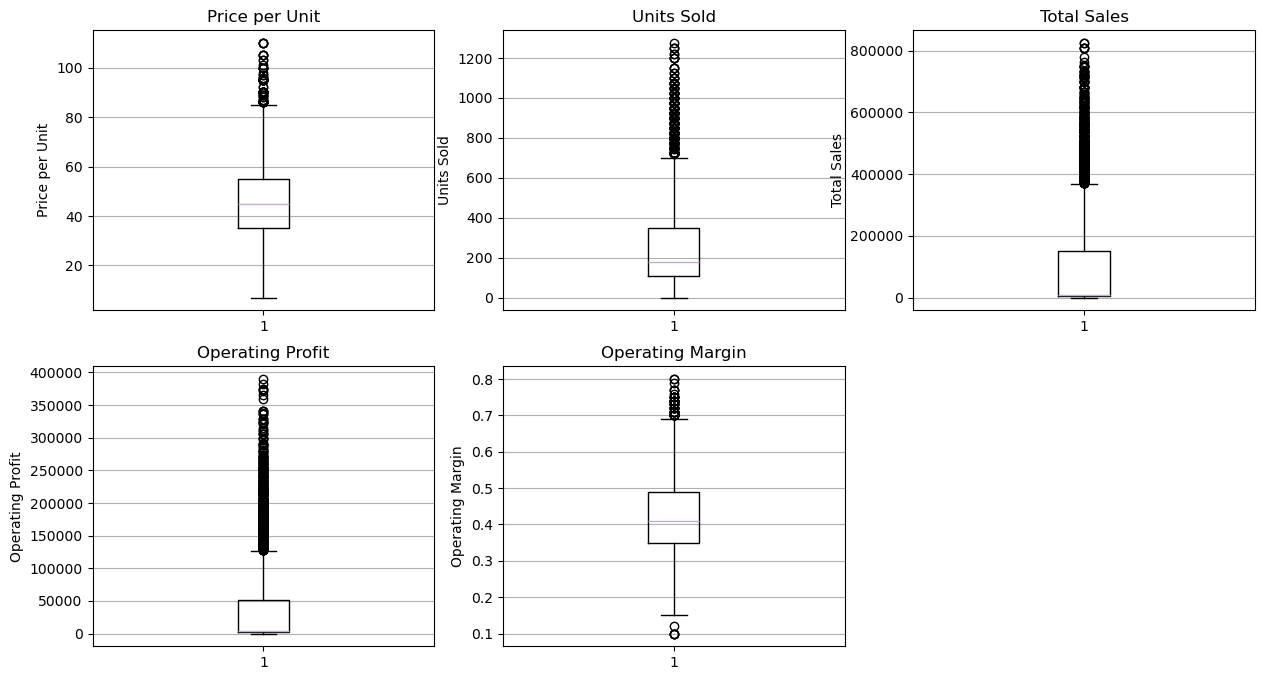

In [15]:
plt.figure(figsize=(15, 8))
for i, coluna in enumerate(colunas_numericas):
    plt.subplot(2, 3, i + 1)  # Ajustar o layout para 2 linhas e 3 colunas
    plt.boxplot(df_adidas[coluna])
    plt.title(coluna)
    plt.ylabel(coluna)
    plt.grid(axis='y')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\boxplot_inicial.png", dpi=200, bbox_inches='tight')

plt.show()

In [16]:
# Aplicar transforma√ß√£o logar√≠tmica
df_adidas['Log_Total_Sales'] = np.log1p(df_adidas['Total Sales'])
df_adidas['Log_Units_Sold'] = np.log1p(df_adidas['Units Sold'])
df_adidas['Log_Operating_Profit'] = np.log1p(df_adidas['Operating Profit'])
df_adidas['Log_Operating_Margin'] = np.log1p(df_adidas['Operating Margin'])
df_adidas['Log_Price_per_Unit'] = np.log1p(df_adidas['Price per Unit'])

In [17]:
colunas_numericas_log = ["Log_Total_Sales", "Log_Units_Sold", "Log_Operating_Profit", "Log_Operating_Margin", "Log_Price_per_Unit"]

### **Impacto da Transforma√ß√£o Logar√≠tmica**  

Ap√≥s a aplica√ß√£o da transforma√ß√£o **log1p**, foi poss√≠vel suavizar a escala dos valores e reduzir a influ√™ncia dos outliers.  

#### Compara√ß√£o Antes e Depois da Transforma√ß√£o (`Total Sales`)  

| M√©trica                 | **Total Sales** (Original) | **Log_Total_Sales** (Transformado) |
|-------------------------|--------------------------|--------------------------------|
| **M√©dia (mean)**        | 93.273,40                | 9,90                           |
| **Desvio Padr√£o (std)** | 141.916,00               | 1,94                           |
| **M√≠nimo (min)**        | 0,00                      | 0,00                           |
| **25% (Q1)**           | 4.254,50                 | 8,36                           |
| **Mediana (Q2)**        | 9.576,00                 | 9,17                           |
| **75% (Q3)**           | 150.000,00               | 11,92                          |
| **M√°ximo (max)**        | 825.000,00               | 13,62                          |

#### Principais Observa√ß√µes  
1. **Redu√ß√£o da Assimetria** ‚Äì Antes da transforma√ß√£o, os valores estavam altamente dispersos, com um **desvio padr√£o muito alto** (141.916). Ap√≥s a transforma√ß√£o, o desvio padr√£o caiu para **1,94**, indicando maior concentra√ß√£o dos valores pr√≥ximos √† m√©dia.  
2. **Diminui√ß√£o do Impacto dos Outliers** ‚Äì O valor m√°ximo original (**825.000**) foi reduzido para **13,62**, tornando os dados mais adequados para an√°lise estat√≠stica e modelagem.  
3. **Normaliza√ß√£o das Vari√°veis Num√©ricas** ‚Äì O mesmo efeito foi observado para **Units Sold, Operating Profit, Operating Margin e Price per Unit**, reduzindo varia√ß√µes extremas e melhorando a distribui√ß√£o.  

#### Visualiza√ß√£o da Transforma√ß√£o  
Para verificar a distribui√ß√£o dos dados antes e depois da transforma√ß√£o, foram gerados histogramas:

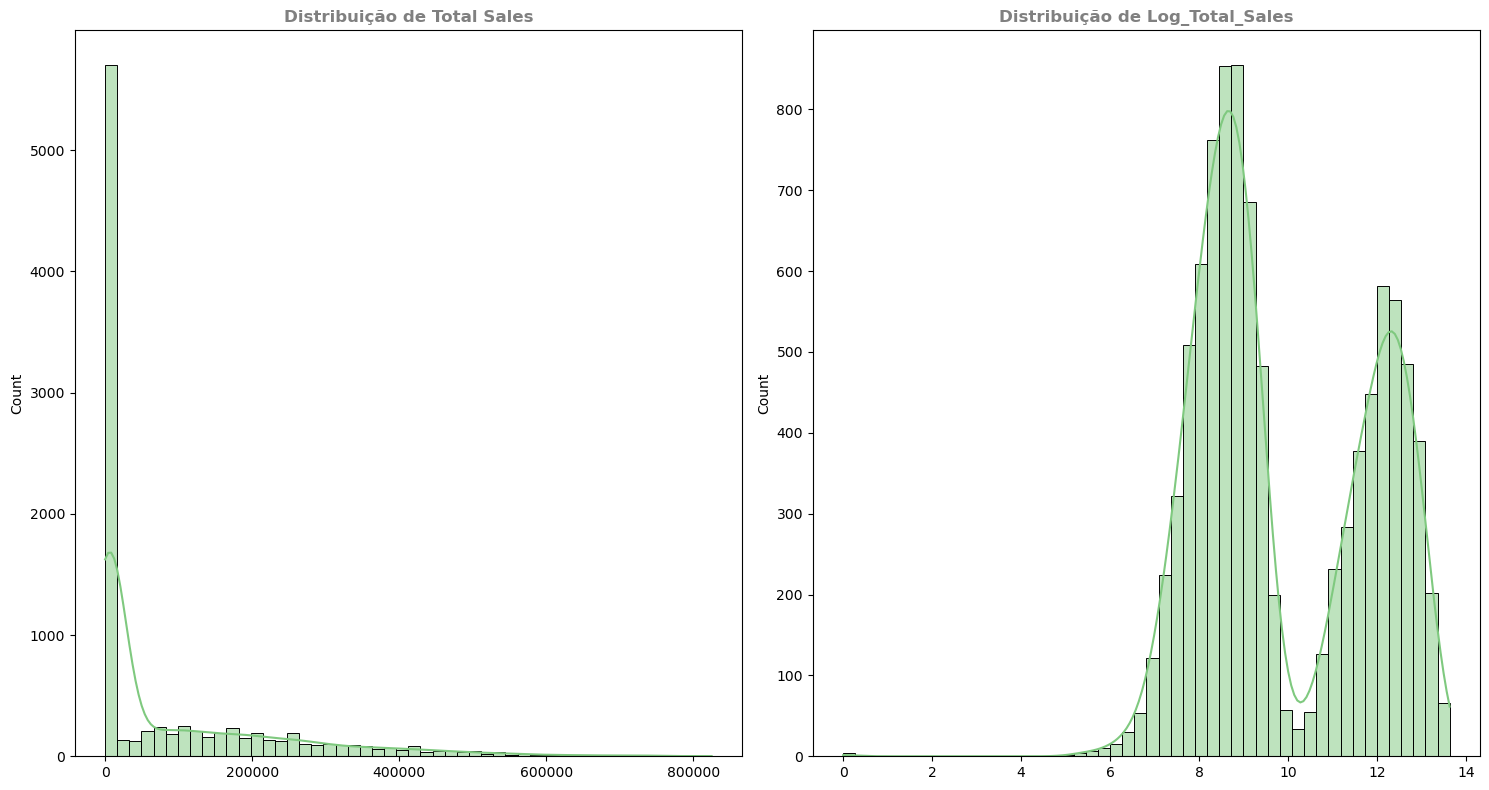

In [18]:
plt.figure(figsize=(15, 8))

# Compara√ß√£o entre colunas originais e transformadas
for i, coluna in enumerate(["Total Sales", "Log_Total_Sales"]):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df_adidas[coluna], bins=50, kde=True)
    plt.title(f'Distribui√ß√£o de {coluna}', fontsize=12, weight='bold', color='gray')
    plt.xlabel("")

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\tratamento_histograma_total_sales_log.png", dpi=200, bbox_inches='tight')

plt.tight_layout()
plt.show()

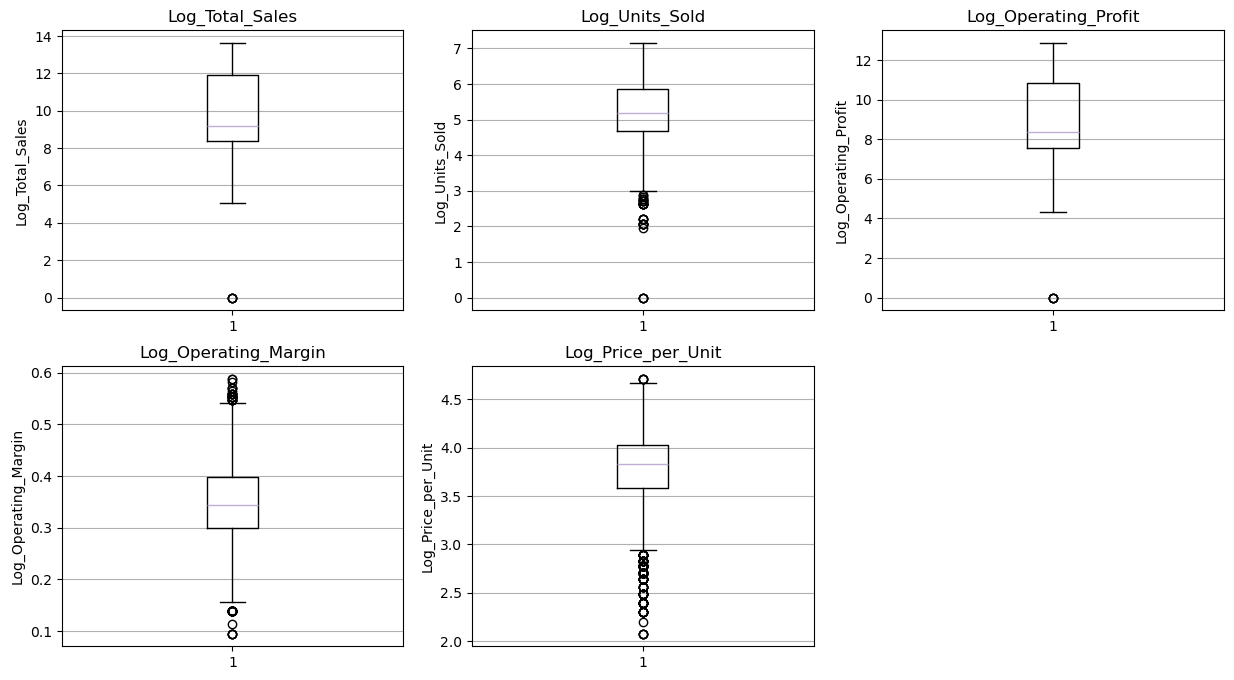

In [19]:
plt.figure(figsize=(15, 8))
for i, coluna in enumerate(colunas_numericas_log):
    plt.subplot(2, 3, i + 1)  # Ajustar o layout para 2 linhas e 3 colunas
    plt.boxplot(df_adidas[coluna])
    plt.title(coluna)
    plt.ylabel(coluna)
    plt.grid(axis='y')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\boxplot_tratamento_parcial_log.png", dpi=200, bbox_inches='tight')

plt.show()

### **Tratamento de Outliers (sem remo√ß√£o)**  

Ap√≥s a aplica√ß√£o da transforma√ß√£o logar√≠tmica, foi necess√°rio realizar o tratamento dos **outliers** para evitar impactos negativos na an√°lise. Em vez de remover os valores extremos, optei por **suaviz√°-los** usando t√©cnicas estat√≠sticas.

#### T√©cnicas Utilizadas  

1Ô∏è‚É£ **Winsorization** ‚Äì Substitui os valores mais extremos pelos percentis **5% e 95%**, mantendo a integridade dos dados.  
2Ô∏è‚É£ **Padroniza√ß√£o (Z-Score)** ‚Äì Normaliza as vari√°veis num√©ricas para que tenham **m√©dia 0 e desvio padr√£o 1**, tornando a distribui√ß√£o mais equilibrada.  

#### Aplica√ß√£o do Tratamento  

O c√≥digo abaixo aplica **Winsorization** para limitar os valores extremos e, em seguida, usa o **Z-Score** para padronizar os dados:  

In [20]:
# Aplicar Winsorization para limitar os valores extremos
for coluna in colunas_numericas_log:
    df_adidas[coluna] = winsorize(df_adidas[coluna], limits=[0.05, 0.05])  # 5% inferior e superior

# Aplicar Padroniza√ß√£o (Z-Score)
scaler = StandardScaler()
df_adidas[colunas_numericas_log] = scaler.fit_transform(df_adidas[colunas_numericas_log])

# Exibir resumo estat√≠stico ap√≥s tratamento
df_adidas[colunas_numericas_log].describe()

3      Log_Total_Sales  Log_Units_Sold  Log_Operating_Profit  \
count     9.648000e+03    9.648000e+03          9.648000e+03   
mean     -4.006377e-16   -2.356692e-16         -1.414015e-16   
std       1.000052e+00    1.000052e+00          1.000052e+00   
min      -1.352629e+00   -1.769420e+00         -1.388812e+00   
25%      -8.293957e-01   -7.327280e-01         -8.257237e-01   
50%      -3.971792e-01   -8.181676e-02         -3.610215e-01   
75%       1.068819e+00    8.035778e-01          1.039684e+00   
max       1.599706e+00    1.743453e+00          1.633285e+00   

3      Log_Operating_Margin  Log_Price_per_Unit  
count          9.648000e+03        9.648000e+03  
mean          -5.862272e-16       -1.154779e-15  
std            1.000052e+00        1.000052e+00  
min           -1.993255e+00       -2.122669e+00  
25%           -7.837209e-01       -6.557479e-01  
50%           -1.003005e-01        1.468311e-01  
75%            7.670198e-01        7.908992e-01  
max            1.886445e+00        1.567958e+00

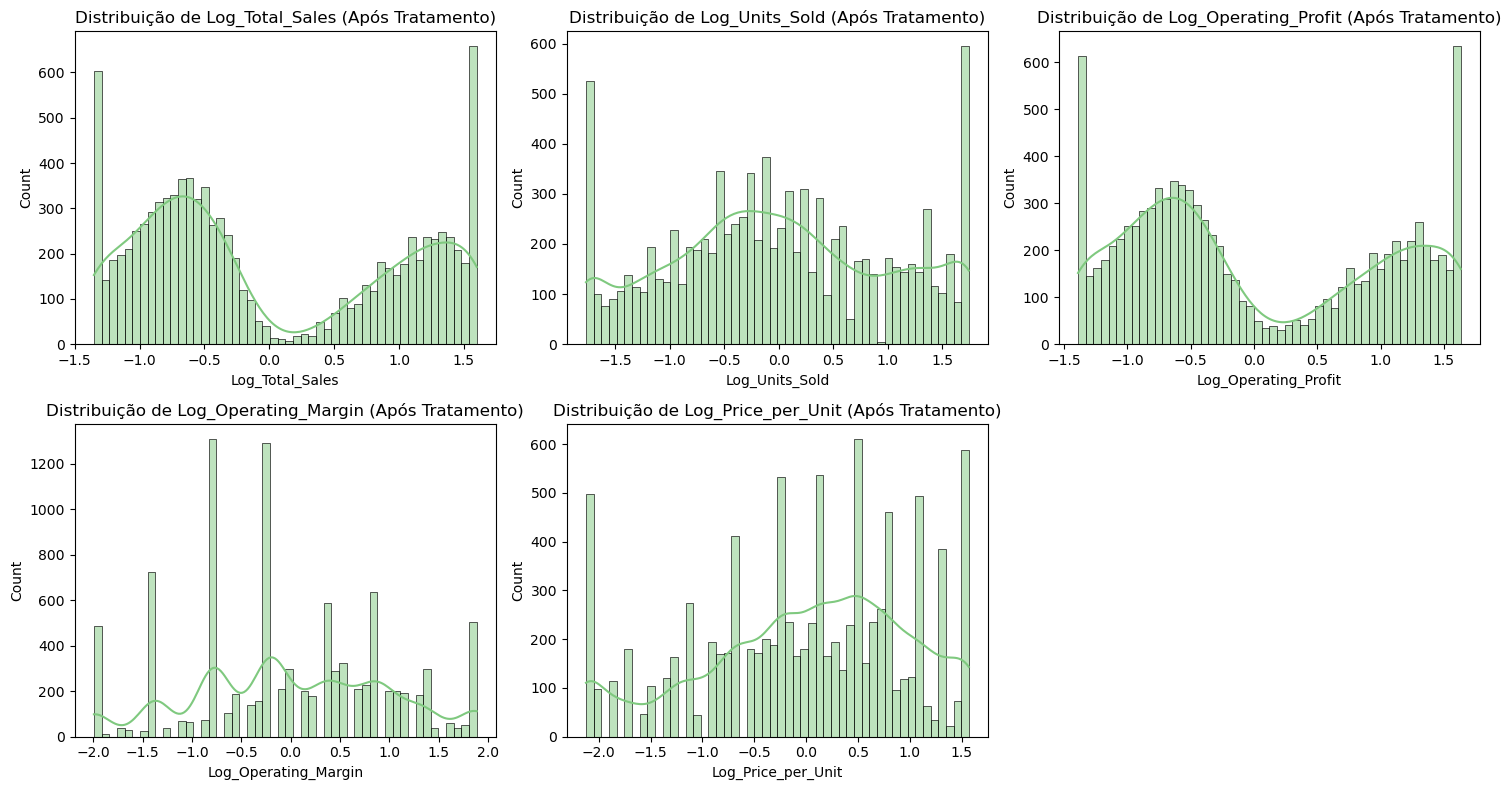

In [21]:
plt.figure(figsize=(15, 8))

# Compara√ß√£o das distribui√ß√µes antes e depois do tratamento
for i, coluna in enumerate(colunas_numericas_log):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_adidas[coluna], bins=50, kde=True)
    plt.title(f'Distribui√ß√£o de {coluna} (Ap√≥s Tratamento)')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\tratamento_histograma_log.png", dpi=200, bbox_inches='tight')

plt.tight_layout()
plt.show()

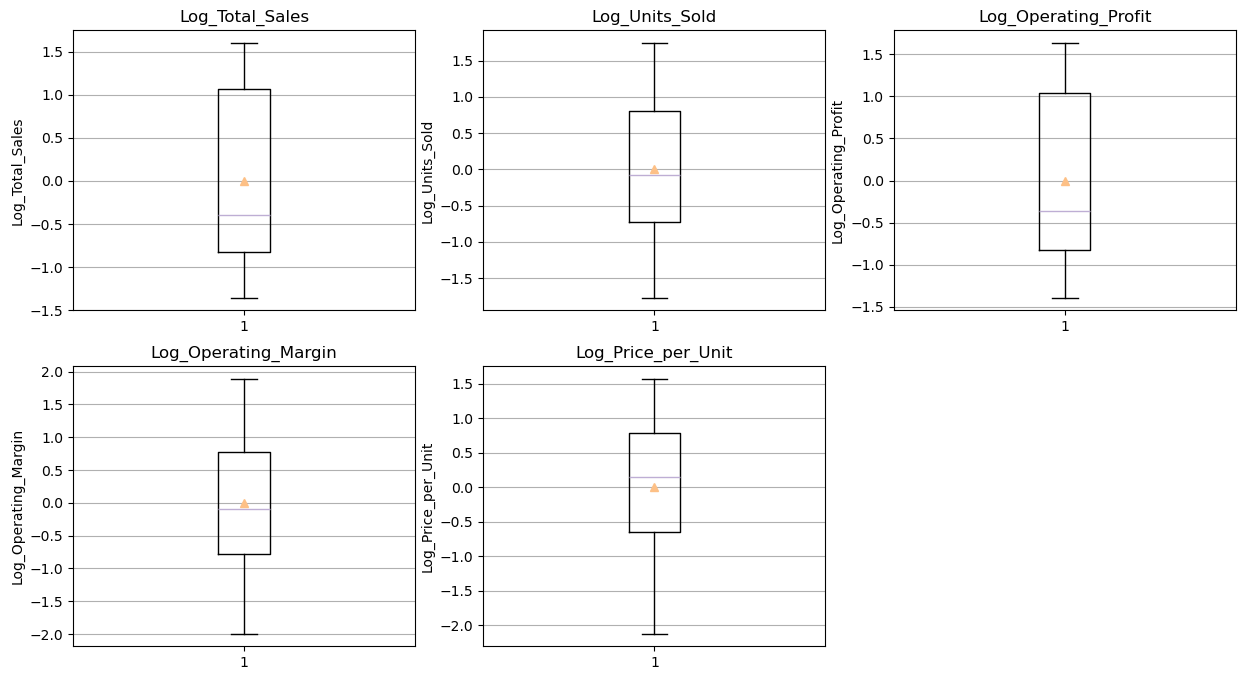

In [22]:
plt.figure(figsize=(15, 8))
for i, coluna in enumerate(colunas_numericas_log):
    plt.subplot(2, 3, i + 1)  # Ajustar o layout para 2 linhas e 3 colunas
    plt.boxplot(df_adidas[coluna], showmeans=True)
    plt.title(coluna)
    plt.ylabel(coluna)
    plt.grid(axis='y')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\boxplot_final_log.png", dpi=200, bbox_inches='tight')

plt.show()

### An√°lise de Regress√£o das Unidades Vendidas com Margem e M√©dia de Pre√ßo

#### Rela√ß√£o entre Margem Operacional e Vendas  
- Existe uma **rela√ß√£o inversa** entre **Log_Operating_Margin** (Margem Operacional em log) e **Log_Units_Sold** (Unidades Vendidas em log).  
- O coeficiente angular (**slope = -0.3372**) indica que **quando a margem operacional aumenta, as vendas tendem a diminuir**.  
- A correla√ß√£o √© **fraca (`r = -0.3372`)**, sugerindo que **a margem operacional n√£o √© o √∫nico fator determinante das vendas**.

#### Signific√¢ncia Estat√≠stica e Impacto no Modelo  
- O resultado √© **estatisticamente significativo** (`p < 0.05`), ou seja, **a rela√ß√£o entre margem operacional e quantidade vendida n√£o √© aleat√≥ria**.  
- No entanto, o coeficiente de determina√ß√£o **R¬≤ = 11.37%** mostra que **a margem operacional explica apenas uma pequena parte da varia√ß√£o das vendas**.  
- Isso indica que outros fatores, como **pre√ßo, promo√ß√µes e categoria do produto**, provavelmente t√™m um impacto maior sobre as vendas.


In [23]:
resultado_regressao1 = linregress(df_adidas["Log_Price_per_Unit"], df_adidas["Log_Units_Sold"])

resultado_regressao1

LinregressResult(slope=0.24824974030326838, intercept=5.100441373509505e-17, rvalue=0.24824974030326805, pvalue=1.9017434684007206e-135, stderr=0.009863110683622472, intercept_stderr=0.009863110683622466)

In [24]:
coeficiente_determinacao1 = resultado_regressao1.rvalue**2

coeficiente_determinacao1

0.06162793356064003

In [25]:
resultado_regressao2 = linregress(df_adidas["Log_Operating_Margin"], df_adidas["Log_Units_Sold"])

resultado_regressao2

LinregressResult(slope=-0.3371634809427263, intercept=-4.3332364107856223e-16, rvalue=-0.3371634809427255, pvalue=4.098681139530409e-255, stderr=0.009585655984597378, intercept_stderr=0.009585655984597362)

In [26]:
coeficiente_determinacao2 = resultado_regressao2.rvalue**2

coeficiente_determinacao2

0.11367921288141564

### Matriz de Covari√¢ncia das Vari√°veis (log)

- O **volume de vendas √© o principal impulsionador do faturamento e do lucro operacional**, mais do que o pre√ßo por unidade.
- A **margem operacional tende a cair √† medida que as vendas aumentam**, possivelmente indicando **redu√ß√£o de pre√ßos para aumentar o volume ou aumento nos custos operacionais**.
- Estrat√©gias que equilibram **pre√ßo, volume de vendas e controle de custos** s√£o essenciais para **maximizar a rentabilidade sem comprometer a margem operacional**.

In [27]:
df_adidas_numericas = df_adidas[colunas_numericas_log]

df_adidas_numericas.cov()

3                     Log_Total_Sales  Log_Units_Sold  Log_Operating_Profit  \
3                                                                             
Log_Total_Sales              1.000104        0.893853              0.993794   
Log_Units_Sold               0.893853        1.000104              0.898636   
Log_Operating_Profit         0.993794        0.898636              1.000104   
Log_Operating_Margin        -0.475063       -0.337198             -0.380258   
Log_Price_per_Unit           0.387278        0.248275              0.389411   

3                     Log_Operating_Margin  Log_Price_per_Unit  
3                                                               
Log_Total_Sales                  -0.475063            0.387278  
Log_Units_Sold                   -0.337198            0.248275  
Log_Operating_Profit             -0.380258            0.389411  
Log_Operating_Margin              1.000104           -0.130357  
Log_Price_per_Unit               -0.130357            1.000104

### Matriz de Correla√ß√£o das Vari√°veis (Log)

A matriz de correla√ß√£o mostra a rela√ß√£o entre as vari√°veis transformadas por logaritmo, ajudando a reduzir o impacto de valores extremos e facilitar a interpreta√ß√£o.

- O **faturamento e o lucro operacional est√£o fortemente relacionados**, o que valida a estrat√©gia de crescimento baseada no volume de vendas.
- **A margem operacional tende a cair √† medida que as vendas aumentam**, indicando a necessidade de um equil√≠brio entre volume e rentabilidade.
- **O pre√ßo unit√°rio tem pouca influ√™ncia sobre o volume de vendas**, sugerindo que fatores externos, como promo√ß√£o e marketing, podem desempenhar um papel maior na decis√£o de compra.

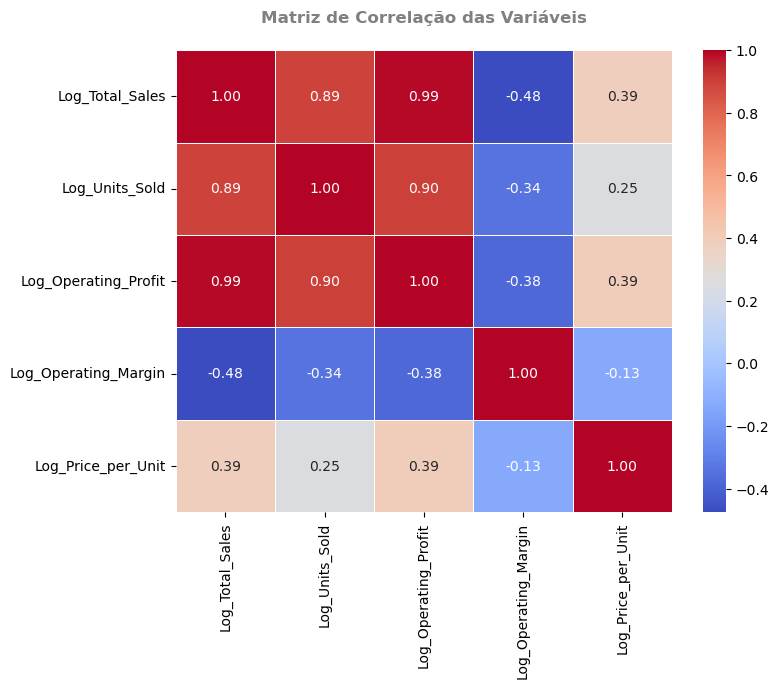

In [28]:
# Calcular matriz de correla√ß√£o
correlation_matrix = df_adidas[colunas_numericas_log].corr()

# Plotar a heatmap de correla√ß√£o
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.ylabel("")
plt.xlabel("")
plt.title("Matriz de Correla√ß√£o das Vari√°veis", fontsize=12, weight='bold', pad=20, color='gray')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\matriz_correlacao_log.png", dpi=200, bbox_inches='tight')

plt.show()

### Refinamento do Tratamento de Outliers  

Ap√≥s realizar a transforma√ß√£o logar√≠tmica para suavizar a dispers√£o dos dados, tive a necessidade de tratar os dados novamente para manter sua integridade, garantindo que cada valor refletisse melhor a granularidade real das informa√ß√µes.

Dessa forma, decidi adotar um **tratamento mais espec√≠fico**, sem aplicar transforma√ß√£o logar√≠tmica, para manter os dados o mais pr√≥ximo poss√≠vel da realidade. Isso permitiria an√°lises mais fi√©is, sem distor√ß√µes causadas pela escala logar√≠tmica.  

### Detec√ß√£o Inicial de Outliers  

Antes de qualquer tratamento, realizei a detec√ß√£o de outliers utilizando o m√©todo **IQR (Intervalo Interquart√≠lico)**. O objetivo era identificar quantos valores estavam al√©m dos limites convencionais:  

- **Limite Inferior** = \( Q1 - 1.5 \times IQR \)  
- **Limite Superior** = \( Q3 + 1.5 \times IQR \)  

Os resultados mostraram um n√∫mero significativo de outliers em v√°rias colunas, refor√ßando a necessidade de um ajuste mais refinado.  

In [29]:
for col in colunas_numericas:
    Q1 = df_adidas[col].quantile(0.25)
    Q3 = df_adidas[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Crit√©rio padr√£o para outliers
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df_adidas[col] < lower_bound) | (df_adidas[col] > upper_bound)).sum()
    
    print(f"{col}: {outliers} outliers detectados.")

Price per Unit: 81 outliers detectados.
Units Sold: 508 outliers detectados.
Total Sales: 653 outliers detectados.
Operating Profit: 706 outliers detectados.
Operating Margin: 63 outliers detectados.


### Winsorization Adaptativa 

Para suavizar os valores extremos sem remov√™-los, implementei uma **Winsorization adaptativa**. Em vez de aplicar um corte fixo, utilizei um ajuste din√¢mico baseado na quantidade de outliers restantes:  

1. **Iniciei com percentis conservadores** (5% a 95%).  
2. **Ajustei dinamicamente os percentis** at√© eliminar os valores extremos sem distorcer os dados.  
3. **Verifiquei a redu√ß√£o de outliers** a cada itera√ß√£o.  

Esse m√©todo permitiu preservar a maior parte da distribui√ß√£o original, ao mesmo tempo em que eliminava valores extremamente discrepantes.  

In [30]:
def ajustar_winsorization_adaptativa(df, colunas_numericas):
    percentis_finais = {}

    for col in colunas_numericas:
        lower, upper = 0.05, 0.95  # Come√ßamos com Winsorization moderada

        while lower > 0.0:
            lower_bound = df[col].quantile(lower)
            upper_bound = df[col].quantile(upper)

            # Criar uma c√≥pia tempor√°ria da coluna
            temp_col = df[col].copy()
            temp_col = temp_col.clip(lower=lower_bound, upper=upper_bound)

            # Calcular IQR para verificar outliers restantes
            Q1 = temp_col.quantile(0.25)
            Q3 = temp_col.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound_iqr = Q1 - 1.5 * IQR
            upper_bound_iqr = Q3 + 1.5 * IQR

            outliers_restantes = ((temp_col < lower_bound_iqr) | (temp_col > upper_bound_iqr)).sum()

            print(f"üîç {col}: {outliers_restantes} outliers restantes | Percentis: {lower:.2f} a {upper:.2f}")

            if outliers_restantes == 0:
                percentis_finais[col] = (lower, upper)
                print(f"‚úÖ Percentis finais para {col}: ({lower:.2f}, {upper:.2f}) - Sem mais outliers\n")
                break

            lower = max(lower - 0.01, 0.0)
            upper = min(upper + 0.01, 1.0)

    return percentis_finais

# üöÄ Aplicar a Winsorization Adaptativa
percentis_finais = ajustar_winsorization_adaptativa(df_adidas, colunas_numericas)

# üöÄ Aplicar os novos limites ao df_adidas
for col, (lower, upper) in percentis_finais.items():
    lower_bound = df_adidas[col].quantile(lower)
    upper_bound = df_adidas[col].quantile(upper)

    print(f"\nüîß Aplicando Winsorization final em {col} | Limites: {lower_bound:.2f} a {upper_bound:.2f}")

    df_adidas[col] = df_adidas[col].clip(lower_bound, upper_bound)

# ‚úÖ **Altera√ß√£o AQUI:** Garantir que os valores no DataFrame sejam atualizados!
df_adidas.update(df_adidas)

print("\n‚úÖ Winsorization Adaptativa aplicada com sucesso!")

üîç Price per Unit: 0 outliers restantes | Percentis: 0.05 a 0.95
‚úÖ Percentis finais para Price per Unit: (0.05, 0.95) - Sem mais outliers

üîç Units Sold: 508 outliers restantes | Percentis: 0.05 a 0.95
üîç Units Sold: 508 outliers restantes | Percentis: 0.04 a 0.96
üîç Units Sold: 508 outliers restantes | Percentis: 0.03 a 0.97
üîç Units Sold: 508 outliers restantes | Percentis: 0.02 a 0.98
üîç Units Sold: 508 outliers restantes | Percentis: 0.01 a 0.99
üîç Total Sales: 653 outliers restantes | Percentis: 0.05 a 0.95
üîç Total Sales: 653 outliers restantes | Percentis: 0.04 a 0.96
üîç Total Sales: 653 outliers restantes | Percentis: 0.03 a 0.97
üîç Total Sales: 653 outliers restantes | Percentis: 0.02 a 0.98
üîç Total Sales: 653 outliers restantes | Percentis: 0.01 a 0.99
üîç Operating Profit: 706 outliers restantes | Percentis: 0.05 a 0.95
üîç Operating Profit: 706 outliers restantes | Percentis: 0.04 a 0.96
üîç Operating Profit: 706 outliers restantes | Percentis: 0

C:\Users\Camilo_Bica\AppData\Local\Temp\ipykernel_10428\1907471207.py:13: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_col = temp_col.clip(lower=lower_bound, upper=upper_bound)


In [31]:
for col in colunas_numericas:
    Q1 = df_adidas[col].quantile(0.25)
    Q3 = df_adidas[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Crit√©rio padr√£o para outliers
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df_adidas[col] < lower_bound) | (df_adidas[col] > upper_bound)).sum()
    
    print(f"{col}: {outliers} outliers detectados.")

Price per Unit: 0 outliers detectados.
Units Sold: 508 outliers detectados.
Total Sales: 653 outliers detectados.
Operating Profit: 706 outliers detectados.
Operating Margin: 0 outliers detectados.


### Aplica√ß√£o do IQR Din√¢mico

Mesmo ap√≥s a Winsorization, percebi que alguns produtos ainda apresentavam valores extremos. Para lidar com isso, implementei um **ajuste din√¢mico do IQR**, aumentando progressivamente o multiplicador do IQR at√© que o n√∫mero de outliers estivesse dentro de um limite aceit√°vel (menos de 5% dos dados).  

1. **Comecei com o crit√©rio tradicional** (1.5x IQR).  
2. **Ajustei progressivamente at√© 3x IQR**, garantindo que as distribui√ß√µes ficassem balanceadas.  
3. **Apliquei os novos limites ao DataFrame**, garantindo que os valores fossem ajustados corretamente.  

In [32]:
iqr_multipliers = {}

for col in ["Units Sold", "Total Sales", "Operating Profit"]:
    multiplier = 2.0  # Come√ßamos com o IQR 2.0x
    while True:
        Q1 = df_adidas[col].quantile(0.25)
        Q3 = df_adidas[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        outliers = ((df_adidas[col] < lower_bound) | (df_adidas[col] > upper_bound)).sum()
        
        print(f"üîç {col}: {outliers} outliers restantes | IQR {multiplier:.1f}x")

        if outliers < 0.05 * len(df_adidas):  
            print(f"‚úÖ Novo crit√©rio final para {col}: IQR {multiplier:.1f}x - Outliers agora sob controle!\n")
            iqr_multipliers[col] = multiplier
            break

        multiplier += 0.5

# ‚úÖ **Altera√ß√£o AQUI:** Aplicar os limites ajustados ao DataFrame
for col, multiplier in iqr_multipliers.items():
    Q1 = df_adidas[col].quantile(0.25)
    Q3 = df_adidas[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    print(f"\nüîß Aplicando Winsorization FINAL em {col} | Limites: {lower_bound:.2f} a {upper_bound:.2f}")

    df_adidas[col] = df_adidas[col].clip(lower_bound, upper_bound)

# ‚úÖ **Altera√ß√£o AQUI:** Atualizar o DataFrame para salvar as mudan√ßas
df_adidas.update(df_adidas)

print("\n‚úÖ Winsorization com IQR ajustado aplicada corretamente!")

üîç Units Sold: 215 outliers restantes | IQR 2.0x
‚úÖ Novo crit√©rio final para Units Sold: IQR 2.0x - Outliers agora sob controle!

üîç Total Sales: 357 outliers restantes | IQR 2.0x
‚úÖ Novo crit√©rio final para Total Sales: IQR 2.0x - Outliers agora sob controle!

üîç Operating Profit: 453 outliers restantes | IQR 2.0x
‚úÖ Novo crit√©rio final para Operating Profit: IQR 2.0x - Outliers agora sob controle!


üîß Aplicando Winsorization FINAL em Units Sold | Limites: -382.00 a 838.00

üîß Aplicando Winsorization FINAL em Total Sales | Limites: -287236.50 a 441491.00

üîß Aplicando Winsorization FINAL em Operating Profit | Limites: -98361.00 a 152344.00

‚úÖ Winsorization com IQR ajustado aplicada corretamente!


In [33]:
# Verificar outliers novamente
for col in colunas_numericas:
    Q1 = df_adidas[col].quantile(0.25)
    Q3 = df_adidas[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 2.0 * IQR  # Mantendo o crit√©rio ajustado
    upper_bound = Q3 + 2.0 * IQR

    outliers = ((df_adidas[col] < lower_bound) | (df_adidas[col] > upper_bound)).sum()
    
    print(f"{col}: {outliers} outliers detectados ap√≥s ajuste final.")

Price per Unit: 0 outliers detectados ap√≥s ajuste final.
Units Sold: 0 outliers detectados ap√≥s ajuste final.
Total Sales: 0 outliers detectados ap√≥s ajuste final.
Operating Profit: 0 outliers detectados ap√≥s ajuste final.
Operating Margin: 0 outliers detectados ap√≥s ajuste final.


### Resultados Ap√≥s o Tratamento

Ap√≥s a aplica√ß√£o da Winsorization e do ajuste do IQR, os outliers foram drasticamente reduzidos:  

- **Antes do tratamento:**  
  - **Units Sold:** 508 outliers  
  - **Total Sales:** 653 outliers  
  - **Operating Profit:** 706 outliers  

- **Depois do tratamento:**  
  - **Units Sold:** 0 outliers  
  - **Total Sales:** 0 outliers  
  - **Operating Profit:** 0 outliers  

Com esse refinamento, garanti que os dados permanecessem pr√≥ximos da realidade, sem remo√ß√£o agressiva de informa√ß√µes, o que permite an√°lises estat√≠sticas e preditivas mais robustas.  

In [34]:
with pd.option_context("float_format", "{:.2f}".format):
    display(df_adidas.describe())

3      Price per Unit  Units Sold  Total Sales  Operating Profit  \
count         9648.00     9648.00      9648.00           9648.00   
mean            44.98      254.48     89366.98          31837.95   
std             13.18      206.37    129231.77          45380.82   
min             22.00        0.00         0.00              0.00   
25%             35.00      106.00      4254.50           1921.00   
50%             45.00      176.00      9576.00           4371.00   
75%             55.00      350.00    150000.00          52062.00   
max             70.00      838.00    441491.00         152344.00   

3      Operating Margin  Log_Total_Sales  Log_Units_Sold  \
count           9648.00          9648.00         9648.00   
mean               0.42            -0.00           -0.00   
std                0.09             1.00            1.00   
min                0.25            -1.35           -1.77   
25%                0.35            -0.83           -0.73   
50%                0.41            -0.40           -0.08   
75%                0.49             1.07            0.80   
max                0.60             1.60            1.74   

3      Log_Operating_Profit  Log_Operating_Margin  Log_Price_per_Unit  
count               9648.00               9648.00             9648.00  
mean                  -0.00                 -0.00               -0.00  
std                    1.00                  1.00                1.00  
min                   -1.39                 -1.99               -2.12  
25%                   -0.83                 -0.78               -0.66  
50%                   -0.36                 -0.10                0.15  
75%                    1.04                  0.77                0.79  
max                    1.63                  1.89                1.57

### Ajuste Fino de Outliers por Produto  

Ao analisar os outliers de forma geral, percebi que algumas vari√°veis ainda apresentavam valores extremos quando segmentadas por produto. Isso indicou que a distribui√ß√£o dos dados variava significativamente entre as diferentes categorias.  

Para corrigir essa inconsist√™ncia, decidi aplicar um **tratamento individualizado para cada produto**, garantindo um ajuste mais preciso dos outliers.  



### Identifica√ß√£o de Outliers por Produto  

Inicialmente, calculei o n√∫mero de outliers em cada vari√°vel separadamente para cada categoria de produto. Utilizei o m√©todo **IQR (Intervalo Interquart√≠lico) ajustado**, com um fator de **2.0x** para uma an√°lise mais detalhada.  

Os resultados mostraram que algumas categorias, como **Men‚Äôs Athletic Footwear** e **Men‚Äôs Apparel**, ainda continham uma quantidade significativa de valores extremos.  

#### Resultados da Identifica√ß√£o de Outliers por Produto  

| Produto                     | Price per Unit | Units Sold | Total Sales | Operating Profit | Operating Margin |
|-----------------------------|---------------|------------|-------------|------------------|------------------|
| Men's Street Footwear       | 0             | 0          | 0           | 0                | 0                |
| Men's Athletic Footwear     | 0             | 39         | 62          | 53               | 0                |
| Women's Street Footwear     | 0             | 45         | 96          | 96               | 0                |
| Women's Athletic Footwear   | 0             | 65         | 91          | 118              | 0                |
| Men's Apparel               | 0             | 89         | 91          | 125              | 0                |
| Women's Apparel             | 0             | 45         | 0           | 0                | 0                |

Com base nesses dados, ficou claro que **Units Sold, Total Sales e Operating Profit ainda possu√≠am outliers relevantes**, necessitando de um ajuste mais refinado.  

In [35]:
# Criar um dicion√°rio para armazenar os resultados
outliers_por_produto = {}

# Verificar outliers em cada produto separadamente
for col in colunas_numericas:
    outliers_por_produto[col] = {}
    
    for produto in df_adidas["Product"].unique():
        # Filtrar os dados para o produto espec√≠fico
        df_produto = df_adidas[df_adidas["Product"] == produto]
        
        # Calcular IQR ajustado
        Q1 = df_produto[col].quantile(0.25)
        Q3 = df_produto[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.0 * IQR
        upper_bound = Q3 + 2.0 * IQR

        # Contar outliers para esse produto e coluna
        outliers = ((df_produto[col] < lower_bound) | (df_produto[col] > upper_bound)).sum()
        
        # Armazenar no dicion√°rio
        outliers_por_produto[col][produto] = outliers

# Converter para DataFrame para visualiza√ß√£o
df_outliers = pd.DataFrame(outliers_por_produto)

# Exibir os resultados
print("\nüìä Outliers por Produto:")
print(df_outliers)


üìä Outliers por Produto:
                           Price per Unit  Units Sold  Total Sales  \
Men's Street Footwear                   0           0            0   
Men's Athletic Footwear                 0          39           62   
Women's Street Footwear                 0          45           96   
Women's Athletic Footwear               0          65           91   
Men's Apparel                           0          89           91   
Women's Apparel                         0          45            0   

                           Operating Profit  Operating Margin  
Men's Street Footwear                     0                 0  
Men's Athletic Footwear                  53                 0  
Women's Street Footwear                  96                 0  
Women's Athletic Footwear               118                 0  
Men's Apparel                           125                 0  
Women's Apparel                           0                 0  


### Winsorization Ajustada com IQR 2.5x

Para eliminar os valores extremos sem perder a integridade dos dados, aumentei o crit√©rio do **IQR de 2.0x para 2.5x**, mas apenas para as colunas que ainda continham outliers:  

- **Units Sold**  
- **Total Sales**  
- **Operating Profit**  

O novo crit√©rio foi aplicado individualmente para cada produto, garantindo um ajuste personalizado para cada categoria.  

Ap√≥s essa etapa, os outliers foram completamente eliminados dessas colunas, resultando em uma distribui√ß√£o mais equilibrada para todas as categorias de produtos.  

‚úÖ **Winsorization com IQR 2.5x aplicada para `Units Sold`, `Total Sales` e `Operating Profit`!**  

In [36]:
# Ajustar IQR dinamicamente apenas para as vari√°veis que ainda t√™m outliers
for col in ["Units Sold", "Total Sales", "Operating Profit"]:
    for produto in df_adidas["Product"].unique():
        df_produto = df_adidas[df_adidas["Product"] == produto]
        
        Q1 = df_produto[col].quantile(0.25)
        Q3 = df_produto[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.5 * IQR  # Aumentamos para 2.5x apenas para essas vari√°veis
        upper_bound = Q3 + 2.5 * IQR

        # Aplicar Winsorization para essas colunas espec√≠ficas
        df_adidas.loc[df_adidas["Product"] == produto, col] = df_adidas.loc[df_adidas["Product"] == produto, col].clip(lower_bound, upper_bound)

print("\n‚úÖ Winsorization com IQR 2.5x aplicada para `Units Sold`, `Total Sales` e `Operating Profit`!")


‚úÖ Winsorization com IQR 2.5x aplicada para `Units Sold`, `Total Sales` e `Operating Profit`!


C:\Users\Camilo_Bica\AppData\Local\Temp\ipykernel_10428\2476768270.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[687.5 687.5 687.5 ... 114.  116.   51. ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_adidas.loc[df_adidas["Product"] == produto, col] = df_adidas.loc[df_adidas["Product"] == produto, col].clip(lower_bound, upper_bound)
C:\Users\Camilo_Bica\AppData\Local\Temp\ipykernel_10428\2476768270.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[400000. 380000. 380000. ...   6016.   3465.   2407.]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_adidas.loc[df_adidas["Product"] == produto, col] = df_adidas.loc[df_adidas["Product"] == produto, col].clip(lower_bound, upper_bound)
C:\Users\Camilo_Bica\AppData\Local\Temp\ipyk

### Verifica√ß√£o Final de Outliers por Produto  

Ap√≥s aplicar os novos ajustes, refiz a contagem de outliers para garantir que todos os valores extremos fossem adequadamente tratados.  

#### Resultados Ap√≥s Ajuste

| Produto                     | Price per Unit | Units Sold | Total Sales | Operating Profit | Operating Margin |
|-----------------------------|---------------|------------|-------------|------------------|------------------|
| Men's Street Footwear       | 0             | 0          | 0           | 0                | 0                |
| Men's Athletic Footwear     | 0             | 0          | 0           | 0                | 0                |
| Women's Street Footwear     | 0             | 0          | 0           | 0                | 0                |
| Women's Athletic Footwear   | 0             | 0          | 0           | 0                | 0                |
| Men's Apparel               | 0             | 0          | 0           | 0                | 0                |
| Women's Apparel             | 0             | 0          | 0           | 0                | 0                |

Como esperado, **n√£o restaram mais outliers em nenhuma vari√°vel**, garantindo que os dados estejam completamente ajustados sem distor√ß√µes significativas.  

In [37]:
# Verificar outliers em cada produto separadamente ap√≥s o ajuste
for col in ["Units Sold", "Total Sales", "Operating Profit"]:  # Apenas colunas ajustadas
    outliers_por_produto[col] = {}
    
    for produto in df_adidas["Product"].unique():
        # Filtrar os dados para o produto espec√≠fico
        df_produto = df_adidas[df_adidas["Product"] == produto]
        
        # Calcular IQR ajustado (agora com 2.5x)
        Q1 = df_produto[col].quantile(0.25)
        Q3 = df_produto[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.5 * IQR  # Novo crit√©rio com IQR 2.5x
        upper_bound = Q3 + 2.5 * IQR

        # Contar outliers para esse produto e coluna
        outliers = ((df_produto[col] < lower_bound) | (df_produto[col] > upper_bound)).sum()
        
        # Armazenar no dicion√°rio
        outliers_por_produto[col][produto] = outliers

# Converter para DataFrame para visualiza√ß√£o
df_outliers_final = pd.DataFrame(outliers_por_produto)

# Exibir os resultados
print("\nüìä Outliers por Produto Ap√≥s Ajuste:")
print(df_outliers_final)


üìä Outliers por Produto Ap√≥s Ajuste:
                           Price per Unit  Units Sold  Total Sales  \
Men's Street Footwear                   0           0            0   
Men's Athletic Footwear                 0           0            0   
Women's Street Footwear                 0           0            0   
Women's Athletic Footwear               0           0            0   
Men's Apparel                           0           0            0   
Women's Apparel                         0           0            0   

                           Operating Profit  Operating Margin  
Men's Street Footwear                     0                 0  
Men's Athletic Footwear                   0                 0  
Women's Street Footwear                   0                 0  
Women's Athletic Footwear                 0                 0  
Men's Apparel                             0                 0  
Women's Apparel                           0                 0  


### Visualiza√ß√£o Final com Boxplots por Produto 

Para validar a efic√°cia do tratamento, gerei **boxplots das vari√°veis num√©ricas segmentadas por produto**. A nova distribui√ß√£o mostrou que os dados est√£o **mais homog√™neos, sem valores extremos que poderiam impactar a an√°lise.**  

Com esse ajuste refinado, agora os dados est√£o prontos para serem utilizados em an√°lises estat√≠sticas e modelagens preditivas com maior confiabilidade.  

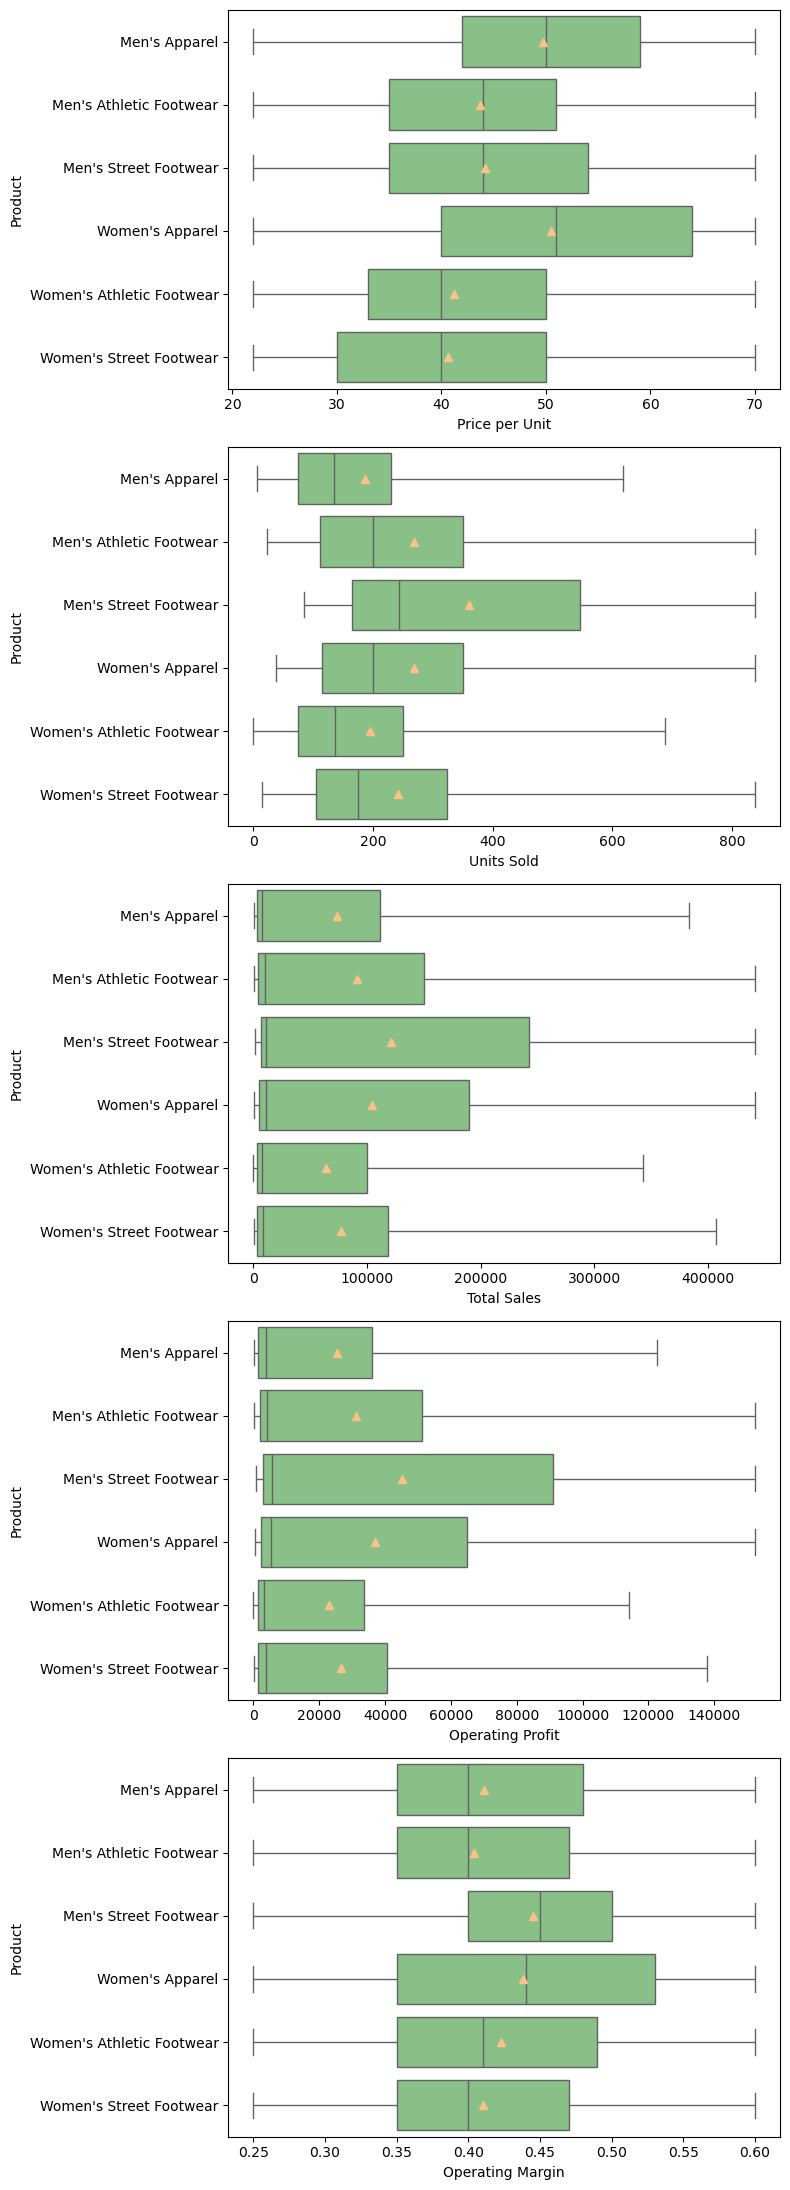

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 22), tight_layout=True, sharey=True)

for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(x=coluna, y='Product', data=df_adidas, ax=axes[i], whis=2.5, showmeans=True)

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\bloxplot_tratado_produtos.png", dpi=300, bbox_inches='tight')

plt.show() 

In [39]:
df_adidas.to_csv(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\dados\df_adidas_tratado.csv", index=False)

## **An√°lise Explorat√≥ria de Dados (EDA)**

#### **Segmenta√ß√£o Temporal e An√°lise Comparativa de Vendas**

Ap√≥s o tratamento dos outliers, segmentei os dados por **ano** para compreender a evolu√ß√£o das vendas ao longo do tempo e identificar padr√µes de comportamento. Para isso, segui os seguintes passos:



#### Prepara√ß√£o dos Dados Temporais
Antes de iniciar a an√°lise comparativa, foi necess√°rio **garantir que a coluna de datas estivesse corretamente formatada** e ordenada.  

- Converto a coluna `Invoice Date` para o formato **datetime**.  
- Ordeno os dados cronologicamente.  
- Defino `Invoice Date` como **√≠ndice** do DataFrame para permitir agrega√ß√µes temporais com `resample()`.  
- Extraio **ano** e **m√™s** da data da fatura e crio colunas auxiliares para facilitar a an√°lise.  

**Objetivo**: Criar uma estrutura que permita a segmenta√ß√£o por per√≠odo e facilite compara√ß√µes entre anos.

In [40]:
# Garantir que 'Invoice Date' seja datetime e ordenar
df_adidas['Invoice Date'] = pd.to_datetime(df_adidas['Invoice Date'])
df_adidas = df_adidas.sort_values(by='Invoice Date')

# Definir 'Invoice Date' como √≠ndice para resample()
df_adidas.set_index('Invoice Date', inplace=True)

# Extrair o ano e o m√™s e adicionar como uma coluna no dataframe
df_adidas['Ano'] = df_adidas.index.year
df_adidas['M√™s'] = df_adidas.index.month

In [41]:
df_adidas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9648 entries, 2020-01-01 to 2021-12-31
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Retailer              9648 non-null   category
 1   Region                9648 non-null   category
 2   State                 9648 non-null   category
 3   City                  9648 non-null   category
 4   Product               9648 non-null   category
 5   Price per Unit        9648 non-null   int32   
 6   Units Sold            9648 non-null   float64 
 7   Total Sales           9648 non-null   float64 
 8   Operating Profit      9648 non-null   float64 
 9   Operating Margin      9648 non-null   float64 
 10  Sales Method          9648 non-null   category
 11  Log_Total_Sales       9648 non-null   float64 
 12  Log_Units_Sold        9648 non-null   float64 
 13  Log_Operating_Profit  9648 non-null   float64 
 14  Log_Operating_Margin  9648 non-null   

### **An√°lise Comparativa por Ano**  

A partir da estrutura temporal, **separei os dados em dois subconjuntos**:  

- `df_2020` ‚Üí Cont√©m apenas as vendas de 2020.  
- `df_2021` ‚Üí Cont√©m apenas as vendas de 2021.  

Em seguida, realizei uma **an√°lise comparativa** das seguintes m√©tricas para cada ano:
- **Total de Unidades Vendidas (`Units Sold`)**  
- **Pre√ßo M√©dio por Unidade (`Price per Unit`)**  
- **Total de Faturamento (`Total Sales`)**  

Para cada **categoria categ√≥rica n√£o ordenada**, agreguei essas m√©tricas para os anos **2020** e **2021**, permitindo visualizar tend√™ncias e varia√ß√µes.  

**Objetivo**: Compreender **quais regi√µes, estados, cidades, varejistas, m√©todos de vendas e produtos** tiveram **maior crescimento ou queda** entre os anos analisados.  

### **Constru√ß√£o da Tabela de Compara√ß√£o**  

Para facilitar a leitura dos resultados, organizei os dados em uma tabela com os seguintes campos:  

| Categoria | Total Units Sold 2020 | Average Price per Unit 2020 | Total Sales 2020 | Total Units Sold 2021 | Average Price per Unit 2021 | Total Sales 2021 |  
|-----------|----------------------|----------------------------|------------------|----------------------|----------------------------|------------------|  

Al√©m disso:  
- Ordenei os dados **do maior para o menor faturamento de 2021**, destacando os principais segmentos.  
- Formatei os n√∫meros para facilitar a interpreta√ß√£o, aplicando **separadores de milhar**.  

**Objetivo**: Criar uma tabela clara e organizada para comparar o desempenho dos diferentes segmentos entre 2020 e 2021.  

In [42]:
# Criar um dataframe para cada ano
df_2020 = df_adidas[df_adidas['Ano'] == 2020]
df_2021 = df_adidas[df_adidas['Ano'] == 2021]

# Criar uma lista para armazenar os resultados do groupby
resultados_groupby = []

# Loop para realizar o groupby e calcular a soma e a m√©dia das unidades vendidas para 2020 e 2021
for coluna in colunas_categoricas_nao_ordenadas:
    # Calcular para 2020
    total_vendas_2020 = df_2020.groupby(coluna, observed=False)["Units Sold"].sum()
    media_preco_medio_2020 = df_2020.groupby(coluna, observed=False)["Price per Unit"].mean().round(2)
    total_faturamento_2020 = df_2020.groupby(coluna, observed=False)["Total Sales"].sum()
    
    # Calcular para 2021
    total_vendas_2021 = df_2021.groupby(coluna, observed=False)["Units Sold"].sum()
    media_preco_medio_2021 = df_2021.groupby(coluna, observed=False)["Price per Unit"].mean().round(2)
    total_faturamento_2021 = df_2021.groupby(coluna, observed=False)["Total Sales"].sum()
    
    # Criar um DataFrame para armazenar as informa√ß√µes de total e m√©dia, por ano
    df_vendas = pd.DataFrame({
        "Total Units Sold 2020": total_vendas_2020,
        "Average Price per Unit 2020": media_preco_medio_2020,
        "Total Sales 2020": total_faturamento_2020,
        "Total Units Sold 2021": total_vendas_2021,
        "Average Price per Unit 2021": media_preco_medio_2021,
        "Total Sales 2021": total_faturamento_2021
    })
    
    df_vendas = df_vendas.sort_values(by="Total Sales 2021", ascending=False)
    resultados_groupby.append(df_vendas.head(10))

df_vendas_final = pd.concat(resultados_groupby, keys=colunas_categoricas_nao_ordenadas)

# Formatar as colunas de 'Total Units Sold' e 'Total Sales' com separa√ß√£o de milhar
df_vendas_final["Total Units Sold 2020"] = df_vendas_final["Total Units Sold 2020"].apply(lambda x: "{:,.0f}".format(x))
df_vendas_final["Total Sales 2020"] = df_vendas_final["Total Sales 2020"].apply(lambda x: "{:,.0f}".format(x))
df_vendas_final["Total Units Sold 2021"] = df_vendas_final["Total Units Sold 2021"].apply(lambda x: "{:,.0f}".format(x))
df_vendas_final["Total Sales 2021"] = df_vendas_final["Total Sales 2021"].apply(lambda x: "{:,.0f}".format(x))

df_vendas_final

Total Units Sold 2020  \
Region       West                                    162,684   
             Northeast                               100,856   
             Midwest                                  20,838   
             Southeast                                68,150   
             South                                    87,460   
State        California                               23,112   
             South Carolina                                0   
             New York                                 97,799   
             Florida                                  68,150   
             North Carolina                                0   
             Hawaii                                        0   
             Texas                                    87,460   
             New Mexico                                    0   
             Louisiana                                     0   
             Virginia                                      0   
City         Charleston                                    0   
             Portland                                      0   
             Los Angeles                                   0   
             Albany                                        0   
             Orlando                                       0   
             Charlotte                                     0   
             San Francisco                            23,112   
             Honolulu                                      0   
             Dallas                                        0   
             Albuquerque                                   0   
Retailer     Foot Locker                             108,922   
             Sports Direct                            44,777   
             West Gear                               191,550   
             Kohl's                                    2,214   
             Amazon                                        0   
             Walmart                                  92,523   
Sales Method In-store                                149,637   
             Online                                   87,085   
             Outlet                                  203,265   
Product      Men's Street Footwear                    91,412   
             Women's Apparel                          77,221   
             Men's Athletic Footwear                  79,361   
             Women's Street Footwear                  74,079   
             Men's Apparel                            56,374   
             Women's Athletic Footwear                61,540   

                                        Average Price per Unit 2020  \
Region       West                                             57.16   
             Northeast                                        47.66   
             Midwest                                          41.29   
             Southeast                                        50.81   
             South                                            38.28   
State        California                                       51.22   
             South Carolina                                     NaN   
             New York                                         47.94   
             Florida                                          50.81   
             North Carolina                                     NaN   
             Hawaii                                             NaN   
             Texas                                            38.28   
             New Mexico                                         NaN   
             Louisiana                                          NaN   
             Virginia                                           NaN   
City         Charleston                                         NaN   
             Portland                                           NaN   
             Los Angeles                                        NaN   
             Albany                                             N

### **Resultados e Insights Principais**  

A an√°lise dos dados revelou algumas **transforma√ß√µes not√°veis** no mercado da Adidas entre 2020 e 2021, destacando uma **expans√£o geogr√°fica, mudan√ßas no comportamento do consumidor e novas tend√™ncias de consumo**.

**Crescimento Exponencial em Algumas Regi√µes**  
- A **Regi√£o Oeste** teve um aumento expressivo nas vendas, saltando de **73 milh√µes** para **184 milh√µes** em faturamento.  
- A **Regi√£o Nordeste** tamb√©m apresentou crescimento relevante.

**Expans√£o Geogr√°fica Significativa**  
- Em **2020**, as vendas estavam concentradas em **apenas 9 estados e 9 cidades**.  
- Em **2021**, houve uma **expans√£o massiva** para **46 estados e 45 cidades**, indicando uma estrat√©gia de alcance nacional mais agressiva e um aumento na distribui√ß√£o.

**Mudan√ßa no M√©todo de Compra**  
- O **Sales Method "Online"** j√° era o mais utilizado, mas em 2021 houve um **crescimento expressivo**, consolidando-se como o principal canal de vendas.  
- Isso refor√ßa a tend√™ncia do e-commerce e a adapta√ß√£o dos consumidores a compras digitais.

**Varejistas com Maior Crescimento**  
- **Foot Locker** e **Sports Direct** mais que **quadruplicaram suas vendas** entre 2020 e 2021.  
- **Amazon** passou de **zero vendas em 2020** para **76 milh√µes em 2021**, indicando uma forte transi√ß√£o para o e-commerce.  

**Mudan√ßa na Prefer√™ncia por Tipo de Produto**  
- Em **2020**, o produto mais vendido era **Men's Street Footwear**, um cal√ßado mais casual.  
- Em **2021**, o destaque passou para **Men's Athletic Footwear**, indicando que os consumidores est√£o mais focados em **bem-estar e atividade f√≠sica**.  

**Conclus√£o**: A Adidas n√£o apenas **expandiu sua presen√ßa geogr√°fica**, mas tamb√©m **se adaptou √†s novas prefer√™ncias dos consumidores**, com um foco maior em **vendas online** e um aumento na demanda por **cal√ßados esportivos**, possivelmente refletindo uma maior preocupa√ß√£o com a sa√∫de e o bem-estar.

In [43]:
df_2020.describe(exclude="number")

3        Retailer Region   State       City                Product  \
count        1302   1302    1302       1302                   1302   
unique          5      5       9          9                      6   
top     West Gear   West  Nevada  Las Vegas  Men's Street Footwear   
freq          635    567     216        216                    219   

3      Sales Method  
count          1302  
unique            3  
top          Online  
freq            530

In [44]:
df_2021.describe(exclude="number")

3          Retailer     Region       State      City                  Product  \
count          8346       8346        8346      8346                     8346   
unique            6          5          46        45                        6   
top     Foot Locker  Northeast  California  Portland  Men's Athletic Footwear   
freq           2300       2145         369       360                     1394   

3      Sales Method  
count          8346  
unique            3  
top          Online  
freq           4359

### An√°lise de Produtos por Categorias Qualitativas

Foram criadas tabelas din√¢micas para analisar as vendas de cada produto considerando tr√™s vari√°veis: **regi√£o, m√©todo de venda e varejista**. 

- **Produtos por Regi√£o**: Identifica√ß√£o das regi√µes com maior volume de vendas e varia√ß√£o de pre√ßo m√©dio.  
- **Produtos por M√©todo de Venda**: Compara√ß√£o do desempenho dos produtos entre vendas online, em lojas f√≠sicas e outlets.  
- **Produtos por Varejista**: An√°lise dos produtos mais vendidos por cada varejista e diferen√ßas nos pre√ßos m√©dios.

O objetivo foi entender como as vendas variam conforme o canal e o local de distribui√ß√£o, ajudando na identifica√ß√£o de padr√µes e oportunidades estrat√©gicas.

In [45]:
# Criar a tabela din√¢mica com as fun√ß√µes de agrega√ß√£o
df_product_region = df_adidas.pivot_table(
    index="Product",
    columns="Region",
    values=["Units Sold", "Total Sales", "Price per Unit"],
    aggfunc={"Units Sold": "sum", "Total Sales": "sum", "Price per Unit": "mean"},
    observed=False
)

# Acessar e arredondar o pre√ßo por unidade para cada regi√£o
for region in df_product_region.columns.levels[1]:  # Iterar sobre as regi√µes
    df_product_region[('Price per Unit', region)] = df_product_region[('Price per Unit', region)].round(2)
    df_product_region[('Units Sold', region)] = df_product_region[('Units Sold', region)].map("{:,.0f}".format)
    df_product_region[('Total Sales', region)] = df_product_region[('Total Sales', region)].map("{:,.0f}".format)

# Ordenar pela coluna 'Total Sales' da primeira regi√£o como exemplo
df_product_region = df_product_region.sort_values(by=('Total Sales', df_product_region.columns.levels[1][0]), ascending=False)

df_product_region

3                         Price per Unit                                    \
Region                           Midwest Northeast  South Southeast   West   
Product                                                                      
Men's Street Footwear              41.87     48.60  35.84     47.87  45.54   
Women's Apparel                    47.37     52.14  42.85     54.86  54.42   
Men's Athletic Footwear            38.28     44.94  37.02     48.03  49.06   
Men's Apparel                      46.92     52.31  42.34     54.10  52.52   
Women's Street Footwear            34.02     40.20  36.10     44.50  47.35   
Women's Athletic Footwear          34.93     41.49  37.21     45.35  46.48   

3                         Total Sales                                      \
Region                        Midwest   Northeast       South   Southeast   
Product                                                                     
Men's Street Footwear      37,611,981  47,489,545  27,180,956  30,455,455   
Women's Apparel            28,002,547  35,200,661  28,058,253  27,308,913   
Men's Athletic Footwear    21,305,539  28,045,638  24,855,740  25,841,116   
Men's Apparel              18,115,628  23,835,749  19,363,090  22,414,228   
Women's Street Footwear    16,244,898  22,835,492  21,551,884  21,756,420   
Women's Athletic Footwear  13,595,154  18,853,194  17,903,278  18,810,668   

3                                     Units Sold                               \
Region                           West    Midwest Northeast    South Southeast   
Product                                                                         
Men's Street Footwear      51,996,593    109,651   129,632  105,764    85,579   
Women's Apparel            49,072,499     69,435    88,004   88,058    68,070   
Men's Athletic Footwear    47,433,082     65,120    79,955   89,384    70,795   
Men's Apparel              34,695,378     45,304    58,825   60,394    51,601   
Women's Street Footwear    41,027,979     56,809    72,908   80,912    65,488   
Women's Athletic Footwear  33,162,624     44,808    57,439   63,898    54,392   

3                                   
Region                        West  
Product                             
Men's Street Footwear      149,330  
Women's Apparel            116,728  
Men's Athletic Footwear    127,204  
Men's Apparel               83,604  
Women's Street Footwear    113,519  
Women's Athletic Footwear   93,399

In [46]:
df_product_sales_method = df_adidas.pivot_table(
    index="Product",
    columns="Sales Method",
    values=["Units Sold", "Total Sales", "Price per Unit"],
    aggfunc={"Units Sold": "sum", "Total Sales": "sum", "Price per Unit": "mean"},
    observed=False
)

for sales_method in df_product_sales_method.columns.levels[1]:  
    df_product_sales_method[('Price per Unit', sales_method)] = df_product_sales_method[('Price per Unit', sales_method)].round(2)
    df_product_sales_method[('Units Sold', sales_method)] = df_product_sales_method[('Units Sold', sales_method)].map("{:,.0f}".format)
    df_product_sales_method[('Total Sales', sales_method)] = df_product_sales_method[('Total Sales', sales_method)].map("{:,.0f}".format)

df_product_sales_method = df_product_sales_method.sort_values(by=('Total Sales', df_product_sales_method.columns.levels[1][0]), ascending=False)

df_product_sales_method

3                         Price per Unit               Total Sales  \
Sales Method                    In-store Online Outlet    In-store   
Product                                                              
Men's Street Footwear              48.54  44.93  40.34  82,801,558   
Women's Apparel                    53.51  51.48  47.08  66,207,169   
Men's Athletic Footwear            46.48  44.18  41.24  56,566,790   
Men's Apparel                      53.64  50.89  45.67  47,598,904   
Women's Street Footwear            42.38  40.83  39.30  46,544,127   
Women's Athletic Footwear          43.05  41.66  39.39  38,868,046   

3                                                 Units Sold                    
Sales Method                   Online      Outlet   In-store   Online   Outlet  
Product                                                                         
Men's Street Footwear      52,994,068  58,938,904    171,842  221,305  186,809  
Women's Apparel            46,955,177  54,480,527    119,954  163,552  146,789  
Men's Athletic Footwear    40,543,259  50,371,066    116,803  163,694  151,961  
Men's Apparel              34,342,861  36,482,308     83,630  116,413   99,685  
Women's Street Footwear    33,298,158  43,574,386    105,311  147,485  136,840  
Women's Athletic Footwear  28,676,951  34,779,921     84,775  120,355  108,806

In [47]:
df_product_retailer = df_adidas.pivot_table(
    index="Product",
    columns="Retailer",
    values=["Units Sold", "Total Sales", "Price per Unit"],
    aggfunc={"Units Sold": "sum", "Total Sales": "sum", "Price per Unit": "mean"},
    observed=False
)

df_product_retailer = df_product_retailer.sort_values(by=('Total Sales', df_product_retailer.columns.levels[1][0]), ascending=False)

for retailer in df_product_retailer.columns.levels[1]: 
    df_product_retailer[('Price per Unit', retailer)] = df_product_retailer[('Price per Unit', retailer)].round(2)
    df_product_retailer[('Units Sold', retailer)] = df_product_retailer[('Units Sold', retailer)].map("{:,.0f}".format)
    df_product_retailer[('Total Sales', retailer)] = df_product_retailer[('Total Sales', retailer)].map("{:,.0f}".format)

df_product_retailer

3                         Price per Unit                                   \
Retailer                          Amazon Foot Locker Kohl's Sports Direct   
Product                                                                     
Men's Street Footwear              50.85       44.92  42.34         39.88   
Women's Apparel                    53.84       50.26  51.69         47.48   
Men's Athletic Footwear            47.16       42.93  43.74         40.18   
Men's Apparel                      54.64       50.10  49.33         46.72   
Women's Street Footwear            41.61       39.05  40.78         38.73   
Women's Athletic Footwear          43.67       40.06  40.63         39.89   

3                                           Total Sales              \
Retailer                  Walmart West Gear      Amazon Foot Locker   
Product                                                               
Men's Street Footwear       46.29     44.41  21,691,600  52,731,288   
Women's Apparel             51.58     51.10  15,455,351  40,276,382   
Men's Athletic Footwear     46.47     45.31  12,011,959  34,973,259   
Men's Apparel               48.06     50.72  10,386,020  27,587,895   
Women's Street Footwear     43.31     42.87   9,376,468  28,161,132   
Women's Athletic Footwear   41.89     42.68   7,872,934  23,105,678   

3                                                                            \
Retailer                       Kohl's Sports Direct     Walmart   West Gear   
Product                                                                       
Men's Street Footwear      22,404,046    36,864,615  12,867,914  48,175,067   
Women's Apparel            20,126,920    35,515,801  13,109,712  43,158,707   
Men's Athletic Footwear    17,754,021    30,672,429  12,317,332  39,752,115   
Men's Apparel              14,137,473    24,316,582  10,309,506  31,686,598   
Women's Street Footwear    14,834,291    27,205,879   9,460,824  34,378,078   
Women's Athletic Footwear  12,486,554    22,665,905   7,962,852  28,230,994   

3                         Units Sold                                    \
Retailer                      Amazon Foot Locker  Kohl's Sports Direct   
Product                                                                  
Men's Street Footwear         54,784     152,382  66,461       122,837   
Women's Apparel               35,885     102,846  49,012        99,181   
Men's Athletic Footwear       31,987     102,586  50,926        99,993   
Men's Apparel                 24,005      68,138  35,903        66,524   
Women's Street Footwear       28,629      91,465  45,910        91,564   
Women's Athletic Footwear     22,544      71,316  38,504        73,372   

3                                            
Retailer                  Walmart West Gear  
Product                                      
Men's Street Footwear      40,286   143,206  
Women's Apparel            36,583   106,788  
Men's Athletic Footwear    36,112   110,854  
Men's Apparel              28,900    76,258  
Women's Street Footwear    30,866   101,202  
Women's Athletic Footwear  26,098    82,102

### Distribui√ß√£o de Produtos por Varejista, Regi√£o e M√©todo de Venda

Foi criada uma tabela cruzada para analisar a distribui√ß√£o percentual das vendas de cada **produto** considerando **varejista, regi√£o e m√©todo de venda**. 

- **Segmenta√ß√£o detalhada**: Permite visualizar como cada produto √© comercializado em diferentes cen√°rios.  
- **C√°lculo de propor√ß√µes**: Os valores foram normalizados para representar a participa√ß√£o relativa de cada m√©todo de venda.  

Essa an√°lise ajuda a entender quais combina√ß√µes de canais e regi√µes s√£o mais relevantes para cada produto.

In [48]:
df_product_all = pd.crosstab(
    [df_adidas["Product"], df_adidas["Retailer"], df_adidas["Region"]],
    df_adidas["Sales Method"],
    margins=True,
    margins_name="Total",
    normalize="index"
)

df_product_all_final = df_product_all.style.format("{:.1%}").background_gradient(cmap="RdYlGn", axis="columns")

df_product_all_final

### An√°lise de Associa√ß√£o entre Produtos e Varejistas

Foi realizado um **teste de qui-quadrado** para verificar a rela√ß√£o entre **tipo de produto e varejista**. O objetivo foi entender se a distribui√ß√£o dos produtos entre os varejistas ocorre de forma aleat√≥ria ou se h√° um padr√£o significativo.

#### Metodologia
- Criada uma **tabela cruzada** com a contagem real de vendas para cada produto em cada varejista.
- Calculadas as **frequ√™ncias esperadas** para avaliar desvios em rela√ß√£o √† distribui√ß√£o te√≥rica.
- Aplicado o **teste de qui-quadrado** para verificar a depend√™ncia entre as vari√°veis.

#### Principais Resultados
- **Estat√≠stica Qui-Quadrado**: 1.85  
- **Valor-p**: 1.0  
- **Graus de liberdade**: 25  

A hip√≥tese nula do teste de qui-quadrado afirma que **n√£o h√° rela√ß√£o significativa entre os tipos de produtos e os varejistas**, ou seja, os produtos s√£o distribu√≠dos de maneira independente entre os diferentes varejistas.

### An√°lise de Associa√ß√£o entre Produtos e Outras Categorias  

Al√©m da an√°lise de varejistas, tamb√©m foram testadas as associa√ß√µes entre **produto e m√©todo de venda** e **produto e regi√£o**.  

- **Produto x M√©todo de Venda**: Valor-p ‚âà **0.99**  
- **Produto x Regi√£o**: Valor-p = **1.0**  

Ambos os testes indicam que **n√£o h√° rela√ß√£o estatisticamente significativa** entre os tipos de produtos e os m√©todos de venda ou as regi√µes. Isso sugere que os produtos s√£o distribu√≠dos de forma relativamente uniforme entre essas categorias, sem padr√µes espec√≠ficos de associa√ß√£o.

In [49]:
# Calcular a tabela cruzada
crosstab = pd.crosstab(df_adidas["Product"], df_adidas["Retailer"])

# Realizar o teste de qui-quadrado
product_retailer = chi2_contingency(crosstab)

# Extrair os resultados
chi2_statistic = product_retailer.statistic
p_value = product_retailer.pvalue
degrees_of_freedom = product_retailer[2]  # √çndice 2 para graus de liberdade
expected_freq = product_retailer[3]  # √çndice 3 para frequ√™ncias esperadas

# Criar um DataFrame com os resultados do teste
df_resultados = pd.DataFrame({
    'Statistic': [chi2_statistic],
    'p-value': [p_value],
    'Degrees of Freedom': [degrees_of_freedom]
})

# Criar um DataFrame para as frequ√™ncias esperadas
df_expectativa_freq = pd.DataFrame(expected_freq, columns=crosstab.columns, index=crosstab.index).round(2)

# Exibir os resultados
print("Resultado Chi-Squared Test:")
display(df_resultados)

print("\n Valores Reais:")
display(pd.crosstab(
    df_adidas["Product"],
    df_adidas["Retailer"]
)
       )

print("\n Valores Experados:")
display(df_expectativa_freq)

Resultado Chi-Squared Test:


Statistic  p-value  Degrees of Freedom
0   1.853211      1.0                  25


 Valores Reais:


Retailer                   Amazon  Foot Locker  Kohl's  Sports Direct  \
Product                                                                 
Men's Apparel                 157          433     171            339   
Men's Athletic Footwear       159          442     172            337   
Men's Street Footwear         159          449     172            335   
Women's Apparel               159          433     172            341   
Women's Athletic Footwear     158          442     171            338   
Women's Street Footwear       157          438     172            342   

Retailer                   Walmart  West Gear  
Product                                        
Men's Apparel                  113        393  
Men's Athletic Footwear        104        396  
Men's Street Footwear          101        394  
Women's Apparel                107        396  
Women's Athletic Footwear      102        395  
Women's Street Footwear         99        400


 Valores Experados:


Retailer                   Amazon  Foot Locker  Kohl's  Sports Direct  \
Product                                                                 
Men's Apparel              157.97       438.95  171.45         338.25   
Men's Athletic Footwear    158.36       440.05  171.88         339.09   
Men's Street Footwear      158.36       440.05  171.88         339.09   
Women's Apparel            158.17       439.50  171.67         338.67   
Women's Athletic Footwear  157.97       438.95  171.45         338.25   
Women's Street Footwear    158.17       439.50  171.67         338.67   

Retailer                   Walmart  West Gear  
Product                                        
Men's Apparel               104.20     395.17  
Men's Athletic Footwear     104.46     396.16  
Men's Street Footwear       104.46     396.16  
Women's Apparel             104.33     395.67  
Women's Athletic Footwear   104.20     395.17  
Women's Street Footwear     104.33     395.67

In [50]:
product_sales_method = chi2_contingency(
    pd.crosstab(df_adidas["Product"], df_adidas["Sales Method"])
)

product_sales_method.pvalue

0.9999999999993749

In [51]:
product_region = chi2_contingency(
    pd.crosstab(df_adidas["Product"], df_adidas["Region"])
)

product_region.pvalue

1.0

### An√°lise do M√©todo de Vendas por Regi√£o e Cidade  

Para entender a distribui√ß√£o dos m√©todos de venda nas diferentes **regi√µes** e **cidades**, foram geradas **tabelas cruzadas** que mostram a participa√ß√£o percentual de cada m√©todo de venda (In-store, Online, Outlet) dentro das regi√µes e cidades.  

#### Distribui√ß√£o do M√©todo de Vendas por Regi√£o 
A primeira an√°lise segmentou as vendas **por regi√£o**, permitindo visualizar quais m√©todos predominam em cada local. 

- **O Sul tem forte presen√ßa de Outlets** (50% das vendas), enquanto o **Sudeste e o Meio-Oeste possuem maior participa√ß√£o de vendas Online**.  
- **O Nordeste √© a regi√£o mais equilibrada**, com vendas distribu√≠das entre os tr√™s m√©todos de forma mais homog√™nea.  
- **No geral, o m√©todo Online lidera com 50,7% das vendas totais**, seguido pelo modelo Outlet (31,3%) e In-store (18,0%).  

#### Distribui√ß√£o do M√©todo de Vendas por Estado e Cidade  
Em seguida, foi gerada uma tabela detalhada **por estado e cidade**, permitindo uma an√°lise mais granular da distribui√ß√£o das vendas.  

- Algumas cidades como **Columbus (Ohio), Sioux Falls (Dakota do Sul) e Charleston (Carolina do Sul)** t√™m **100% de suas vendas no formato Online**.  
- **Los Angeles e San Francisco t√™m predomin√¢ncia de Outlets** (66,7% das vendas), sugerindo um comportamento diferente do restante da Costa Oeste.  
- **Detroit, Milwaukee e Indian√°polis possuem equil√≠brio entre os m√©todos** com 50% In-store e 50% Online.  

Esse detalhamento √© crucial para compreender **varia√ß√µes geogr√°ficas nos h√°bitos de compra**, permitindo estrat√©gias diferenciadas para cada mercado.


In [52]:
df_region_sales_method = pd.crosstab(
    df_adidas["Region"],
    df_adidas["Sales Method"],
    margins=True,
    margins_name="Total",
    normalize="index"
)

df_region_sales_method_final = df_region_sales_method.style.format("{:.1%}").background_gradient(cmap="RdYlGn", axis="columns")

df_region_sales_method_final

In [53]:
df_region_sales_method = pd.crosstab(
    [df_adidas["Region"], df_adidas["State"], df_adidas["City"]],
    df_adidas["Sales Method"],
    margins=True,
    margins_name="Total",
    normalize="index"
)

df_region_sales_method_final = df_region_sales_method.style.format("{:.1%}").background_gradient(cmap="RdYlGn", axis="columns")

df_region_sales_method_final

### An√°lise de Associa√ß√£o entre M√©todo de Venda e Regi√£o

Para avaliar se o **m√©todo de venda** (In-store, Online, Outlet) est√° associado √† **regi√£o**, foi realizado um **teste de qui-quadrado**, comparando a distribui√ß√£o real das vendas com as frequ√™ncias esperadas sob hip√≥tese de independ√™ncia.

#### Resultados do Teste
- **Estat√≠stica Qui-Quadrado**: 1079.92  
- **Valor-p**: 8.31e-228  
- **Graus de liberdade**: 8  

O **valor-p extremamente baixo** indica que rejeitamos a hip√≥tese nula, ou seja, **h√° uma rela√ß√£o significativa entre o m√©todo de venda e a regi√£o**. Isso significa que **a forma como os clientes compram varia de uma regi√£o para outra**.

#### Principais Observa√ß√µes
- A regi√£o **Sul** tem a menor participa√ß√£o em vendas In-store (apenas 20), enquanto o **Nordeste e o Oeste possuem distribui√ß√µes mais equilibradas** entre os tr√™s m√©todos.  
- As **frequ√™ncias esperadas diferem significativamente das reais**, especialmente para **Outlets na regi√£o Sul e Online no Nordeste**, refor√ßando que certos m√©todos s√£o mais populares em determinadas √°reas.  
- O **Meio-Oeste e o Sudeste s√£o as regi√µes mais inclinadas ao m√©todo Online**, enquanto o Oeste tem maior presen√ßa de Outlets.  

Essa an√°lise confirma que **estrat√©gias de venda devem ser adaptadas a cada regi√£o**, aproveitando o comportamento dos consumidores locais.

In [54]:
# Calcular a tabela cruzada
crosstab = pd.crosstab(df_adidas["Region"], df_adidas["Sales Method"])

# Realizar o teste de qui-quadrado
sales_method_region = chi2_contingency(crosstab)

# Extrair os resultados
chi2_statistic = sales_method_region.statistic
p_value = sales_method_region.pvalue
degrees_of_freedom = sales_method_region[2]  # √çndice 2 para graus de liberdade
expected_freq = sales_method_region[3]  # √çndice 3 para frequ√™ncias esperadas

# Criar um DataFrame com os resultados do teste
df_resultados = pd.DataFrame({
    'Statistic': [chi2_statistic],
    'p-value': [p_value],
    'Degrees of Freedom': [degrees_of_freedom]
})

# Criar um DataFrame para as frequ√™ncias esperadas
df_expectativa_freq = pd.DataFrame(expected_freq, columns=crosstab.columns, index=crosstab.index).round(2)

# Exibir os resultados
print("Resultado Chi-Squared Test:")
display(df_resultados)

print("\n Valores Reais:")
display(pd.crosstab(
    df_adidas["Region"],
    df_adidas["Sales Method"]
)
       )

print("\n Valores Experados:")
display(df_expectativa_freq)

Resultado Chi-Squared Test:


Statistic        p-value  Degrees of Freedom
0  1079.920161  8.311235e-228                   8


 Valores Reais:


Sales Method  In-store  Online  Outlet
Region                                
Midwest            445    1165     262
Northeast          683     936     757
South               20     844     864
Southeast          194     792     238
West               398    1152     898


 Valores Experados:


Sales Method  In-store   Online  Outlet
Region                                 
Midwest         337.61   948.61  585.78
Northeast       428.51  1204.01  743.49
South           311.64   875.64  540.72
Southeast       220.75   620.25  383.01
West            441.49  1240.49  766.01

### Distribui√ß√£o dos M√©todos de Venda por Varejista

Foi realizada uma an√°lise da **distribui√ß√£o dos m√©todos de venda** entre os varejistas para identificar padr√µes no comportamento de compra dos consumidores.

#### Principais Resultados
- **Amazon** tem a maior concentra√ß√£o de vendas **online (56.9%)**, confirmando sua domin√¢ncia no e-commerce.  
- **West Gear** possui a maior participa√ß√£o em **vendas In-store (29.4%)**, sugerindo uma forte presen√ßa f√≠sica.  
- **Walmart** tem a maior parcela de vendas via **Outlet (48.1%)**, o que pode indicar foco em liquida√ß√µes e estoques excedentes.  
- **Foot Locker e Kohl‚Äôs** possuem distribui√ß√µes bastante similares, com vendas equilibradas entre **lojas f√≠sicas e online**.  
- **Sports Direct** se destaca por uma propor√ß√£o mais elevada de vendas via **Outlets (36.6%)**, sugerindo uma estrat√©gia mais voltada para esse canal.

A an√°lise confirma que **cada varejista possui um perfil distinto de vendas**, refletindo suas estrat√©gias e prefer√™ncias do p√∫blico. Essa informa√ß√£o pode ser usada para alinhar melhor o mix de produtos e promo√ß√µes conforme o canal mais utilizado por cada varejista.


In [55]:
df_retailer_sales_method = pd.crosstab(
    df_adidas["Retailer"],
    df_adidas["Sales Method"],
    margins=True,
    margins_name="Total",
    normalize="index"
)

df_retailer_sales_method_final = df_retailer_sales_method.style.format("{:.1%}").background_gradient(cmap="RdYlGn", axis="columns")

df_retailer_sales_method_final

### An√°lise da Associa√ß√£o entre Varejistas e M√©todos de Venda

Foi realizado um **teste de qui-quadrado** para avaliar se h√° uma associa√ß√£o significativa entre os diferentes varejistas e os m√©todos de venda utilizados.

#### Principais Resultados
- **Estat√≠stica Qui-Quadrado**: 405.83  
- **Valor-p**: 5.41e-81  
- **Graus de liberdade**: 10  

O **baixo valor-p (< 0.001)** indica que **h√° uma associa√ß√£o significativa entre os varejistas e os m√©todos de venda**. Isso significa que os diferentes varejistas utilizam estrat√©gias de vendas distintas, com prefer√™ncias espec√≠ficas por determinados canais de distribui√ß√£o.  


In [56]:
# Calcular a tabela cruzada
crosstab = pd.crosstab(df_adidas["Retailer"], df_adidas["Sales Method"])

# Realizar o teste de qui-quadrado
sales_method_retailer = chi2_contingency(crosstab)

# Extrair os resultados
chi2_statistic = sales_method_retailer.statistic
p_value = sales_method_retailer.pvalue
degrees_of_freedom = sales_method_retailer[2]  # √çndice 2 para graus de liberdade
expected_freq = sales_method_retailer[3]  # √çndice 3 para frequ√™ncias esperadas

# Criar um DataFrame com os resultados do teste
df_resultados = pd.DataFrame({
    'Statistic': [chi2_statistic],
    'p-value': [p_value],
    'Degrees of Freedom': [degrees_of_freedom]
})

# Criar um DataFrame para as frequ√™ncias esperadas
df_expectativa_freq = pd.DataFrame(expected_freq, columns=crosstab.columns, index=crosstab.index).round(2)

# Exibir os resultados
print("Resultado Chi-Squared Test:")
display(df_resultados)

print("\n Valores Reais:")
display(pd.crosstab(
    df_adidas["Retailer"],
    df_adidas["Sales Method"]
)
       )

print("\n Valores Experados:")
display(df_expectativa_freq)

Resultado Chi-Squared Test:


Statistic       p-value  Degrees of Freedom
0  405.828797  5.408039e-81                  10


 Valores Reais:


Sales Method   In-store  Online  Outlet
Retailer                               
Amazon              118     540     291
Foot Locker         449    1395     793
Kohl's              144     576     310
Sports Direct       293     995     744
Walmart              37     288     301
West Gear           699    1095     580


 Valores Experados:


Sales Method   In-store   Online  Outlet
Retailer                                
Amazon           171.15   480.89  296.96
Foot Locker      475.58  1336.27  825.16
Kohl's           185.76   521.94  322.30
Sports Direct    366.47  1029.69  635.84
Walmart          112.90   317.22  195.88
West Gear        428.15  1202.99  742.86

### An√°lise da Associa√ß√£o entre Estados e M√©todos de Venda

Foi realizado um **teste de qui-quadrado** para avaliar se h√° uma rela√ß√£o significativa entre os diferentes estados e os m√©todos de venda utilizados.

#### Principais Resultados
- **Estat√≠stica Qui-Quadrado**: 4483.03  
- **Valor-p**: 0.0  
- **Graus de liberdade**: 98  

O **valor-p extremamente baixo (< 0.001)** confirma que **h√° uma associa√ß√£o significativa entre os estados e os m√©todos de venda**. Isso indica que as estrat√©gias de vendas n√£o s√£o uniformes em todos os estados, sugerindo que cada mercado pode ter uma abordagem diferente para os canais de distribui√ß√£o.  


In [57]:
# Calcular a tabela cruzada
crosstab = pd.crosstab(df_adidas["State"], df_adidas["Sales Method"])

# Realizar o teste de qui-quadrado
sales_method_state = chi2_contingency(crosstab)

# Extrair os resultados
chi2_statistic = sales_method_state.statistic
p_value = sales_method_state.pvalue
degrees_of_freedom = sales_method_state[2]  # √çndice 2 para graus de liberdade
expected_freq = sales_method_state[3]  # √çndice 3 para frequ√™ncias esperadas

# Criar um DataFrame com os resultados do teste
df_resultados = pd.DataFrame({
    'Statistic': [chi2_statistic],
    'p-value': [p_value],
    'Degrees of Freedom': [degrees_of_freedom]
})

# Criar um DataFrame para as frequ√™ncias esperadas
df_expectativa_freq = pd.DataFrame(expected_freq, columns=crosstab.columns, index=crosstab.index).round(2)

# Exibir os resultados
print("Resultado Chi-Squared Test:")
display(df_resultados)

print("\n Valores Reais:")
display(pd.crosstab(
    df_adidas["State"],
    df_adidas["Sales Method"]
)
       )

print("\n Valores Experados:")
display(df_expectativa_freq)

Resultado Chi-Squared Test:


Statistic  p-value  Degrees of Freedom
0  4483.030875      0.0                  98


 Valores Reais:


Sales Method    In-store  Online  Outlet
State                                   
Alabama                0      72     144
Alaska                 0      72      72
Arizona                0     144      72
Arkansas               0     144      72
California             0     144     288
Colorado              72      72       0
Connecticut           72      72      72
Delaware              72      72       0
Florida              122     144      94
Georgia                0     144      72
Hawaii                 0      72      72
Idaho                  0     144      72
Illinois               0      72      72
Indiana               72      72       0
Iowa                  72      72       0
Kansas                 0     144       0
Kentucky               0     144       0
Louisiana             20     124      72
Maine                  0      72      72
Maryland              72      72       0
Massachusetts         72      72      72
Michigan              72      72       0
Minnesota             26      72      46
Mississippi            0     144      72
Missouri              72      72       0
Montana                0      72      72
Nebraska               0      72      72
Nevada                38      72     106
New Hampshire         28      72     116
New Jersey            72      72       0
New Mexico             0     144      72
New York              79     144     137
North Carolina         0     144       0
North Dakota          59      85       0
Ohio                   0     144       0
Oklahoma               0     144      72
Oregon                72      72      72
Pennsylvania           0      72     144
Rhode Island          72      72      72
South Carolina         0     144       0
South Dakota           0     144       0
Tennessee              0      72     144
Texas                  0     144     288
Utah                  72      72      72
Vermont               72      72      72
Virginia              72      72      72
Washington            72      72       0
West Virginia         72      72       0
Wisconsin             72      72       0
Wyoming               72      72       0


 Valores Experados:


Sales Method    In-store  Online  Outlet
State                                   
Alabama            38.96  109.46   67.59
Alaska             25.97   72.97   45.06
Arizona            38.96  109.46   67.59
Arkansas           38.96  109.46   67.59
California         77.91  218.91  135.18
Colorado           25.97   72.97   45.06
Connecticut        38.96  109.46   67.59
Delaware           25.97   72.97   45.06
Florida            64.93  182.43  112.65
Georgia            38.96  109.46   67.59
Hawaii             25.97   72.97   45.06
Idaho              38.96  109.46   67.59
Illinois           25.97   72.97   45.06
Indiana            25.97   72.97   45.06
Iowa               25.97   72.97   45.06
Kansas             25.97   72.97   45.06
Kentucky           25.97   72.97   45.06
Louisiana          38.96  109.46   67.59
Maine              25.97   72.97   45.06
Maryland           25.97   72.97   45.06
Massachusetts      38.96  109.46   67.59
Michigan           25.97   72.97   45.06
Minnesota          25.97   72.97   45.06
Mississippi        38.96  109.46   67.59
Missouri           25.97   72.97   45.06
Montana            25.97   72.97   45.06
Nebraska           25.97   72.97   45.06
Nevada             38.96  109.46   67.59
New Hampshire      38.96  109.46   67.59
New Jersey         25.97   72.97   45.06
New Mexico         38.96  109.46   67.59
New York           64.93  182.43  112.65
North Carolina     25.97   72.97   45.06
North Dakota       25.97   72.97   45.06
Ohio               25.97   72.97   45.06
Oklahoma           38.96  109.46   67.59
Oregon             38.96  109.46   67.59
Pennsylvania       38.96  109.46   67.59
Rhode Island       38.96  109.46   67.59
South Carolina     25.97   72.97   45.06
South Dakota       25.97   72.97   45.06
Tennessee          38.96  109.46   67.59
Texas              77.91  218.91  135.18
Utah               38.96  109.46   67.59
Vermont            38.96  109.46   67.59
Virginia           38.96  109.46   67.59
Washington         25.97   72.97   45.06
West Virginia      25.97   72.97   45.06
Wisconsin          25.97   72.97   45.06
Wyoming            25.97   72.97   45.06

### An√°lise Temporal das Unidades Vendidas

A evolu√ß√£o das vendas ao longo do tempo foi analisada por meio de um **gr√°fico de linha**, permitindo visualizar tend√™ncias e varia√ß√µes mensais.

#### Principais Observa√ß√µes
- Durante **2020**, as vendas apresentaram oscila√ß√µes, com quedas significativas em alguns meses.
- No final de **2020**, houve uma forte queda nas vendas, atingindo seu menor ponto no per√≠odo analisado.
- Em **janeiro de 2021**, h√° um **salto abrupto** nas unidades vendidas, indicando uma grande recupera√ß√£o.
- A partir de **2021**, as vendas se estabilizaram em um patamar elevado, com pequenas varia√ß√µes mensais.

#### Poss√≠veis Interpreta√ß√µes
- A queda observada em **2020** pode estar relacionada a **fatores externos**, como restri√ß√µes econ√¥micas ou mudan√ßas no comportamento do consumidor.
- O crescimento em **2021** sugere uma **expans√£o de mercado**, poss√≠vel aumento da demanda ou maior distribui√ß√£o dos produtos.
- A estabilidade nas vendas ao longo de **2021** pode indicar um **ajuste bem-sucedido na estrat√©gia comercial** da Adidas.

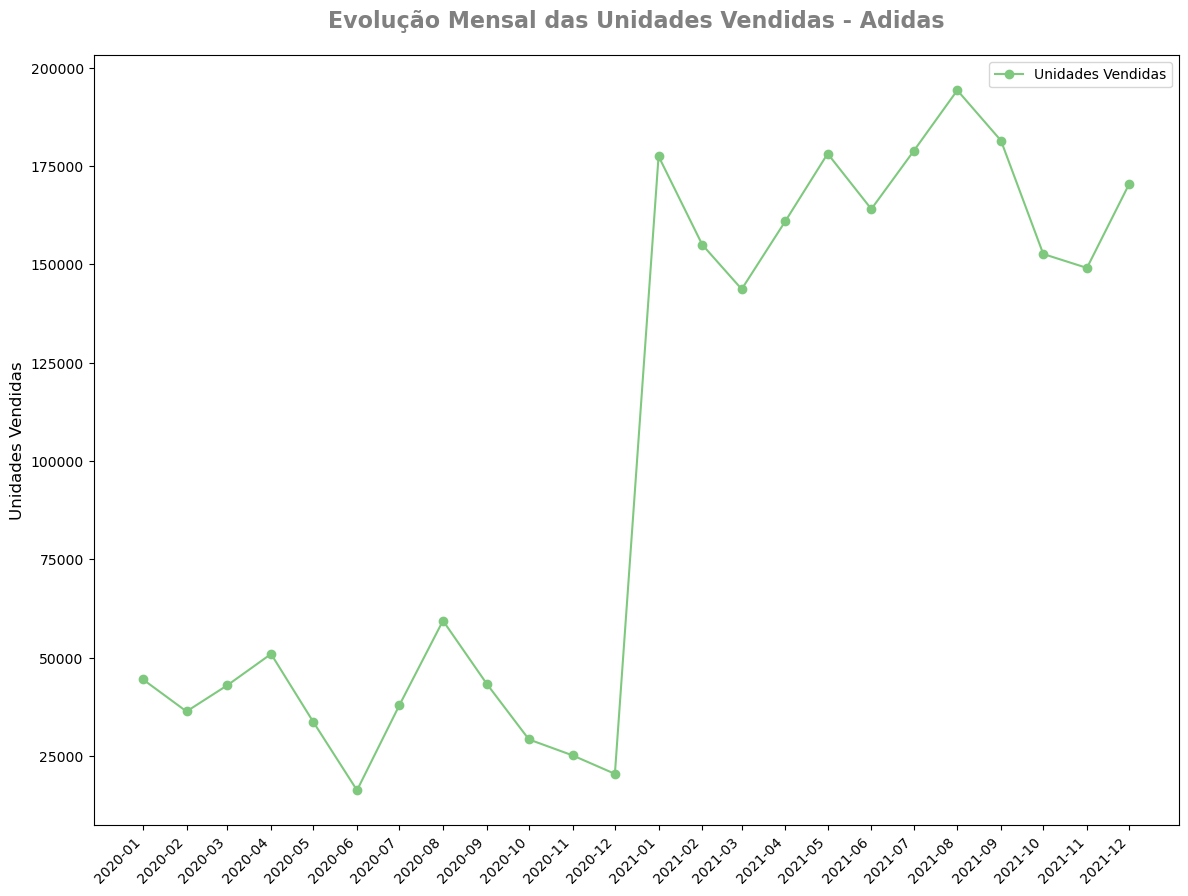

In [58]:
# Agrupar por m√™s e somar as unidades vendidas
df_mensal = df_adidas['Units Sold'].resample('MS').sum()

# Plotar o gr√°fico de linha agrupado por m√™s
plt.figure(figsize=(14, 10))

plt.plot(
    df_mensal.index,   # Eixo X: Datas agrupadas por m√™s
    df_mensal.values,  # Eixo Y: Unidades Vendidas por m√™s
    marker='o', 
    linestyle='-',  
    label='Unidades Vendidas'
)

# Definir os r√≥tulos do eixo X para mostrar todos os meses
plt.xticks(
    ticks=df_mensal.index,                     # Datas como ticks
    labels=df_mensal.index.strftime('%Y-%m'),  # Formatar como Ano-M√™s
    rotation=45,                               
    ha='right'                                 
)

# Configura√ß√µes do gr√°fico
plt.xlabel('')
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.title('Evolu√ß√£o Mensal das Unidades Vendidas - Adidas', fontsize=16, weight='bold', pad=20, color='gray')
plt.xticks(rotation=45)
plt.grid(False) 
plt.legend(loc='upper right')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\analise_temporal_vendas.png", dpi=200, bbox_inches='tight')

plt.show()

### An√°lise Percentual de Vendas por Produto e Canal

Para compreender melhor as mudan√ßas nas vendas, foi realizada uma an√°lise percentual comparando os anos de **2020 e 2021**. Foram avaliadas as **categorias de produtos mais vendidas** e a **distribui√ß√£o das vendas por canal**.

#### Principais Observa√ß√µes
**Mudan√ßa no perfil dos produtos mais vendidos**:
  - Em **2020**, o produto mais vendido foi **Men's Street Footwear**, representando **20.8%** das vendas.
  - J√° em **2021**, **Men‚Äôs Street Footwear** aumentou sua participa√ß√£o para **24.4%**, consolidando-se como o principal produto.
  - **Men‚Äôs Athletic Footwear** perdeu participa√ß√£o relativa, enquanto as demais categorias permaneceram relativamente est√°veis.

**Altera√ß√£o na distribui√ß√£o dos canais de venda**:
  - Em **2020**, os canais mais relevantes eram **Outlet (46.2%)** e **In-store (34.0%)**, com **Online** representando apenas **19.8%**.
  - Em **2021**, houve um **crescimento expressivo das vendas online**, que passaram a representar **42.2%** do total, enquanto o canal **Outlet** perdeu espa√ßo.
  - O canal **In-store** tamb√©m sofreu redu√ß√£o, indicando uma poss√≠vel mudan√ßa de comportamento dos consumidores para compras digitais.

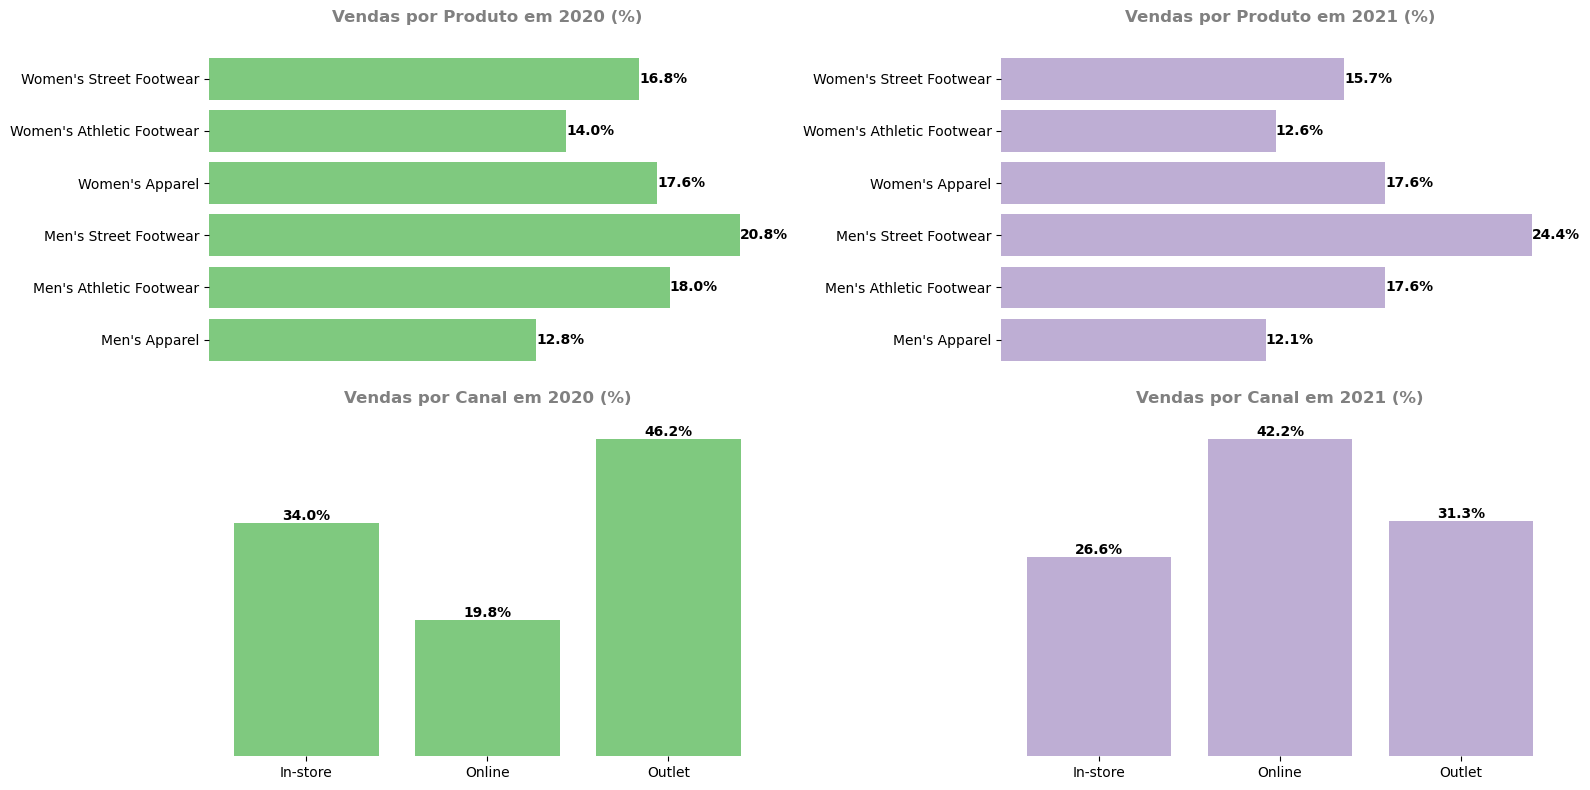

In [59]:
# Agrupar por ano e produto para calcular as vendas
vendas_por_produto = df_adidas.groupby([df_adidas.index.year, 'Product'], observed=False)['Units Sold'].sum().unstack()

# Agrupar por ano e canal de vendas para calcular as vendas
vendas_por_canal = df_adidas.groupby([df_adidas.index.year, 'Sales Method'], observed=False)['Units Sold'].sum().unstack()

# Normalizar os valores para porcentagem (%) dentro de cada ano
vendas_2020_prod_pct = (vendas_por_produto.loc[2020] / vendas_por_produto.loc[2020].sum()) * 100
vendas_2021_prod_pct = (vendas_por_produto.loc[2021] / vendas_por_produto.loc[2021].sum()) * 100
vendas_2020_canal_pct = (vendas_por_canal.loc[2020] / vendas_por_canal.loc[2020].sum()) * 100
vendas_2021_canal_pct = (vendas_por_canal.loc[2021] / vendas_por_canal.loc[2021].sum()) * 100

# Criar a figura e os subgr√°ficos (2x2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), sharey=False)

# Fun√ß√£o para adicionar r√≥tulos nas barras
def adicionar_rotulos(ax, horizontal=False):
    for p in ax.patches:
        if horizontal:
            ax.annotate(
                f"{p.get_width():.1f}%",  # Para gr√°fico horizontal, usamos width
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, fontweight='bold', color='black'
            )
        else:
            ax.annotate(
                f"{p.get_height():.1f}%",  # Para gr√°fico vertical, usamos height
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
            )

# Gr√°fico 1: Vendas por Produto em 2020 (Barras Horizontais)
axes[0, 0].barh(vendas_2020_prod_pct.index, vendas_2020_prod_pct.values, color='C0')
axes[0, 0].set_title('Vendas por Produto em 2020 (%)', fontsize=12, weight='bold', pad=15, color='gray')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')
axes[0, 0].set_xticks([])
axes[0, 0].tick_params(bottom=False)
axes[0, 0].grid(False)
adicionar_rotulos(axes[0, 0], horizontal=True)

# Gr√°fico 2: Vendas por Produto em 2021 (Barras Horizontais)
axes[0, 1].barh(vendas_2021_prod_pct.index, vendas_2021_prod_pct.values, color='C1')
axes[0, 1].set_title('Vendas por Produto em 2021 (%)', fontsize=12, weight='bold', pad=15, color='gray')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].set_xticks([])
axes[0, 1].tick_params(bottom=False)
axes[0, 1].grid(False)
adicionar_rotulos(axes[0, 1], horizontal=True)

# Gr√°fico 3: Vendas por Canal em 2020 (Barras Verticais)
axes[1, 0].bar(vendas_2020_canal_pct.index, vendas_2020_canal_pct.values, color='C0')
axes[1, 0].set_title('Vendas por Canal em 2020 (%)', fontsize=12, weight='bold', pad=15, color='gray')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')
axes[1, 0].set_yticks([])
axes[1, 0].tick_params(left=False)
axes[1, 0].grid(False)
adicionar_rotulos(axes[1, 0])

# Gr√°fico 4: Vendas por Canal em 2021 (Barras Verticais)
axes[1, 1].bar(vendas_2021_canal_pct.index, vendas_2021_canal_pct.values, color='C1')
axes[1, 1].set_title('Vendas por Canal em 2021 (%)', fontsize=12, weight='bold', pad=15, color='gray')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')
axes[1, 1].set_yticks([])
axes[1, 1].tick_params(left=False)
axes[1, 1].grid(False)
adicionar_rotulos(axes[1, 1])

# Remover o box (spines) de todos os gr√°ficos
for ax in axes.flat:
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\analise_percentual_produto_canal.png", dpi=200, bbox_inches='tight')

# Ajustar layout para n√£o sobrepor os t√≠tulos
plt.tight_layout()
plt.show()

### An√°lise do Faturamento, Pre√ßo M√©dio e Quantidade Vendida

Nesta an√°lise, foram exploradas tr√™s dimens√µes essenciais para entender o desempenho das vendas da Adidas nos anos de **2020 e 2021**: **pre√ßo m√©dio dos produtos, quantidade vendida e evolu√ß√£o do faturamento ao longo do tempo**.

#### 1. Compara√ß√£o Mensal: Pre√ßo M√©dio vs. Quantidade Vendida
- Os gr√°ficos superiores mostram a rela√ß√£o entre **pre√ßo m√©dio dos produtos** e **quantidade vendida** em cada m√™s de **2020 e 2021**.
- **2020** apresentou maior varia√ß√£o nos pre√ßos, com picos em **maio e agosto**, enquanto **2021** teve um aumento mais constante ao longo do ano.
- A **quantidade vendida aumentou significativamente em 2021**, indicando maior demanda pelos produtos Adidas.

#### 2. Evolu√ß√£o do Faturamento (Total Sales)
- O gr√°fico inferior apresenta a evolu√ß√£o mensal do faturamento nos dois anos.
- **2021 teve um crescimento expressivo**, especialmente no segundo semestre, alcan√ßando seu maior pico em **dezembro**.
- Em **2020**, as vendas foram mais vol√°teis, com quedas acentuadas entre **maio e junho**, possivelmente devido a efeitos da pandemia.

#### Principais Conclus√µes
- A **eleva√ß√£o na quantidade de vendas em 2021** impulsionou o crescimento do faturamento, apesar de oscila√ß√µes nos pre√ßos m√©dios.
- O **padr√£o sazonal de vendas foi mais est√°vel em 2021**, sugerindo uma demanda mais consolidada pelos produtos Adidas ao longo do ano.
- A an√°lise conjunta do **pre√ßo m√©dio e volume de vendas** ajuda a entender o comportamento do consumidor e pode ser √∫til para otimizar estrat√©gias de precifica√ß√£o.

In [60]:
# Se o √≠ndice for de data (DatetimeIndex), vamos extrair o ano e o m√™s
df_adidas['Ano'] = df_adidas.index.year
df_adidas['M√™s'] = df_adidas.index.month

# Agora, o c√≥digo para agrupar por Ano e M√™s deve funcionar sem erro
preco_medio_mensal = df_adidas.groupby(['Ano', 'M√™s'])['Price per Unit'].mean().reset_index()
quantidade_vendida_mensal = df_adidas.groupby(['Ano', 'M√™s'])['Units Sold'].sum().reset_index()
total_sales_mensal = df_adidas.groupby(['Ano', 'M√™s'])['Total Sales'].sum().reset_index()

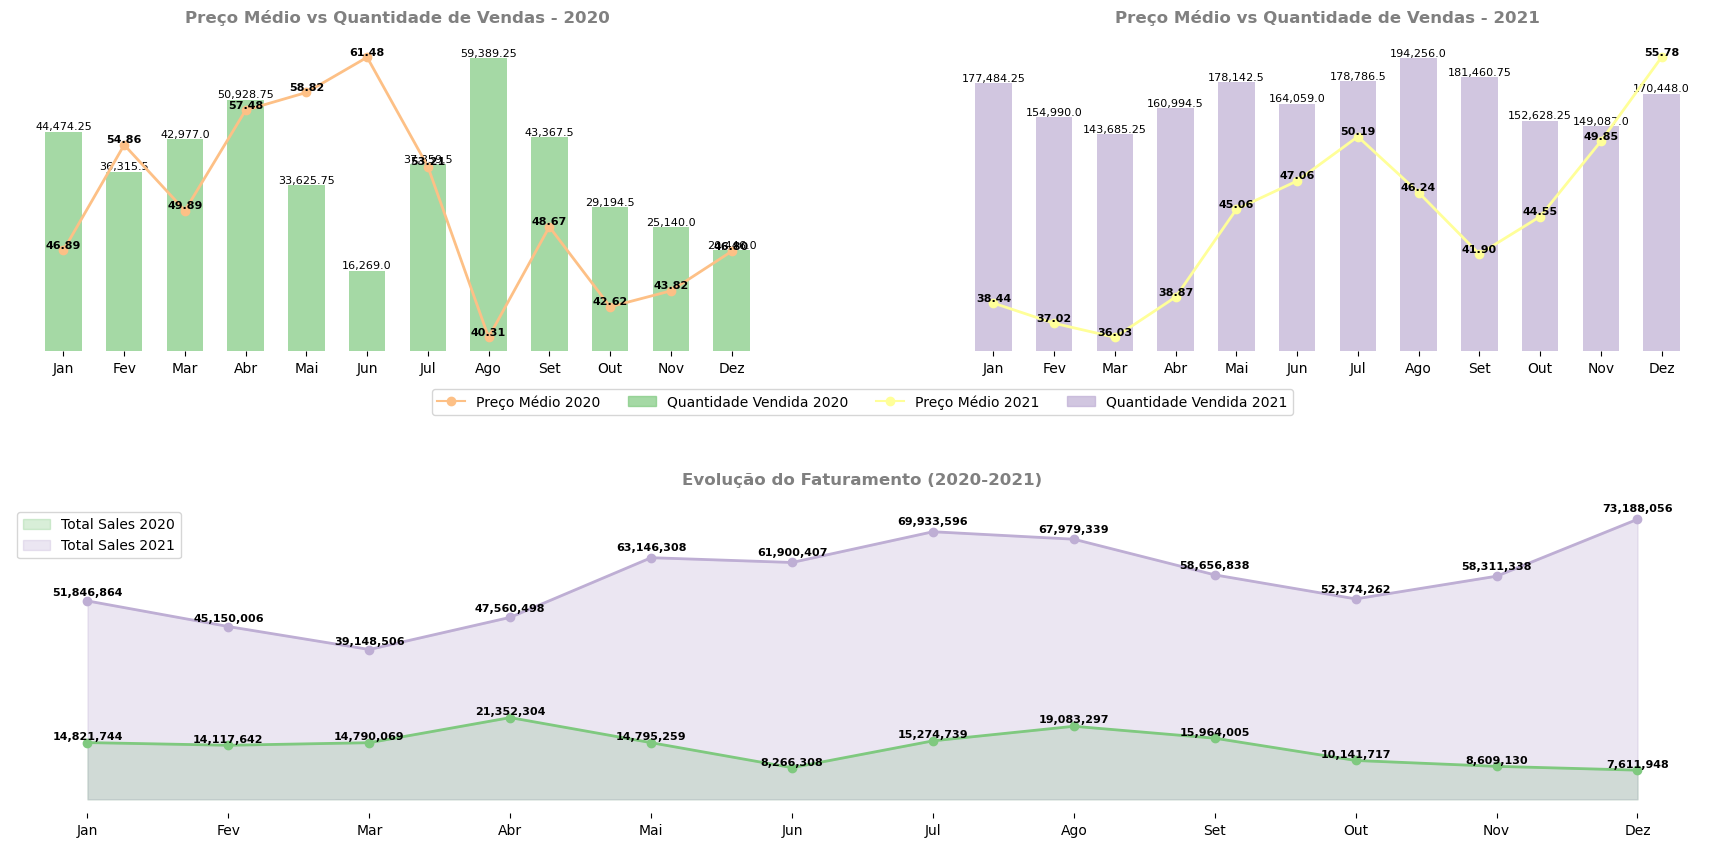

In [61]:
# Criar o mosaico com subgr√°ficos (1 linha, 2 colunas)
mosaico = "AB;CC"
fig = plt.figure(figsize=(22, 10))
espacamento = {'wspace': 0.2, 'hspace': 0.5}
axs = fig.subplot_mosaic(mosaico, gridspec_kw=espacamento)

ax1 = axs['A']
ax2 = axs['B']
ax3 = axs['C']  

# Cores para os gr√°ficos
cores_barras = ['C0', 'C1']
cores_linhas = ['C2', 'C3']
cores_anos = {2020: 'C0', 2021: 'C1'}  # Cores para o gr√°fico de √°rea

# Criar os gr√°ficos para 2020 e 2021
for i, ano in enumerate([2020, 2021]):
    ax1 = axs['A' if ano == 2020 else 'B']  # Define o eixo correto do mosaico
    
    # Filtrar os dados para o ano atual
    dados_preco = preco_medio_mensal[preco_medio_mensal['Ano'] == ano]
    dados_vendas = quantidade_vendida_mensal[quantidade_vendida_mensal['Ano'] == ano]

    # Criar as barras para a Quantidade Vendida
    ax1.bar(dados_vendas['M√™s'], dados_vendas['Units Sold'], color=cores_barras[i], alpha=0.7, width=0.6)

    # Adicionar r√≥tulos acima das barras
    for j, valor in enumerate(dados_vendas['Units Sold']):
        ax1.text(dados_vendas['M√™s'].iloc[j], valor, f"{valor:,}", ha='center', va='bottom', fontsize=8)

    ax1.set_ylabel('')
    ax1.set_yticks([])  
    ax1.tick_params(left=False)  
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

    # Criar o segundo eixo Y para o Pre√ßo M√©dio
    ax2 = ax1.twinx()
    ax2.plot(dados_preco['M√™s'], dados_preco['Price per Unit'], marker='o', color=cores_linhas[i], linewidth=2)
    
    # Adicionar r√≥tulos acima dos pontos da linha
    for j, valor in enumerate(dados_preco['Price per Unit']):
        ax2.text(dados_preco['M√™s'].iloc[j], valor, f"{valor:.2f}", ha='center', va='bottom', fontsize=8, fontweight='bold')

    ax2.set_ylabel('')
    ax2.set_yticks([])  
    ax2.tick_params(right=False)  

    # Configura√ß√µes do gr√°fico
    ax1.set_xlabel('')
    ax1.set_title(f'Pre√ßo M√©dio vs Quantidade de Vendas - {ano}', fontsize=12, weight='bold', pad=15, color='gray')

    # Remover o box (spines) manualmente para ax1 e ax2
    for spine in ['top', 'right', 'left', 'bottom']:
        ax1.spines[spine].set_visible(False)
        ax2.spines[spine].set_visible(False)

# Adicionar legenda dos gr√°ficos de barras
handles = [
    plt.Line2D([0], [0], color=cores_linhas[0], marker='o', linestyle='-', label='Pre√ßo M√©dio 2020'),
    plt.Rectangle((0, 0), 1, 1, color=cores_barras[0], alpha=0.7, label='Quantidade Vendida 2020'),
    plt.Line2D([0], [0], color=cores_linhas[1], marker='o', linestyle='-', label='Pre√ßo M√©dio 2021'),
    plt.Rectangle((0, 0), 1, 1, color=cores_barras[1], alpha=0.7, label='Quantidade Vendida 2021')
]

plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(-0.1, -0.1), ncol=4)

# -------------------------------------------------------------------------------------------------------
# Criar o gr√°fico de √°rea para o Total Sales (ax3)
for ano in [2020, 2021]:
    dados_ano = total_sales_mensal[total_sales_mensal['Ano'] == ano]

    # Criar √°rea preenchida
    ax3.fill_between(dados_ano['M√™s'], dados_ano['Total Sales'], color=cores_anos[ano], alpha=0.3, label=f'Total Sales {ano}')
    
    # Adicionar pontos sobre a linha
    ax3.plot(dados_ano['M√™s'], dados_ano['Total Sales'], marker='o', color=cores_anos[ano], linewidth=2)
    
    # Adicionar r√≥tulos acima dos pontos
    for j, valor in enumerate(dados_ano['Total Sales']):
        ax3.text(dados_ano['M√™s'].iloc[j], valor * 1.02, f"{valor:,.0f}", 
                 ha='center', va='bottom', fontsize=8, fontweight='bold')

# Configura√ß√µes do gr√°fico de Total Sales
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title("Evolu√ß√£o do Faturamento (2020-2021)", fontsize=12, weight='bold', pad=15, color='gray')

# Remover ticks do eixo Y
ax3.set_yticks([])
ax3.tick_params(left=False)

# Adicionar grid e legenda
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.legend(loc='upper left')

# Ajustar layout para evitar sobreposi√ß√£o
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Remover o box (spines) de ambos os eixos
for spine in ['top', 'right', 'left', 'bottom']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)
    ax3.spines[spine].set_visible(False)

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\analise_faturamento_preco_medio.png", dpi=200, bbox_inches='tight')

plt.show()

### Distribui√ß√£o das Vendas por Canal (2020 vs. 2021)

Nesta an√°lise, foram comparadas as vendas pelos diferentes **canais de venda** (In-store, Online e Outlet) ao longo dos anos **2020 e 2021**. Os gr√°ficos mostram a participa√ß√£o percentual de cada canal em rela√ß√£o ao total de vendas mensais.

#### 1. Mudan√ßas nos Padr√µes de Venda
Em **2020**, houve grande varia√ß√£o na distribui√ß√£o das vendas entre os canais.
  - **Outlet** liderando no in√≠cio do ano e voltando a crescer no final.
  - **In-store** teve picos abruptos, principalmente em **junho e julho**.
  - **Online** manteve-se mais est√°vel, com participa√ß√£o crescente ao longo do tempo.

Em **2021**, a distribui√ß√£o dos canais se tornou **mais equilibrada e previs√≠vel**:
  - **Vendas online cresceram consistentemente**, tornando-se o principal canal ao longo do ano.
  - **In-store e Outlet** mantiveram participa√ß√£o est√°vel, sem as varia√ß√µes extremas observadas no ano anterior.

#### 2. Insights e Tend√™ncias
- O crescimento do **e-commerce** foi evidente em 2021, consolidando-se como o principal canal de vendas.
- A **instabilidade das vendas presenciais em 2020** sugere impacto de fatores externos, possivelmente relacionados a restri√ß√µes de mobilidade.
- Em 2021, a **distribui√ß√£o mais equilibrada** entre os canais indica que a empresa conseguiu ajustar suas opera√ß√µes e fortalecer sua presen√ßa digital.

Esses padr√µes refor√ßam a **import√¢ncia do canal online** e indicam uma **necessidade de otimiza√ß√£o do mix de canais** para melhor atender √† demanda do mercado.

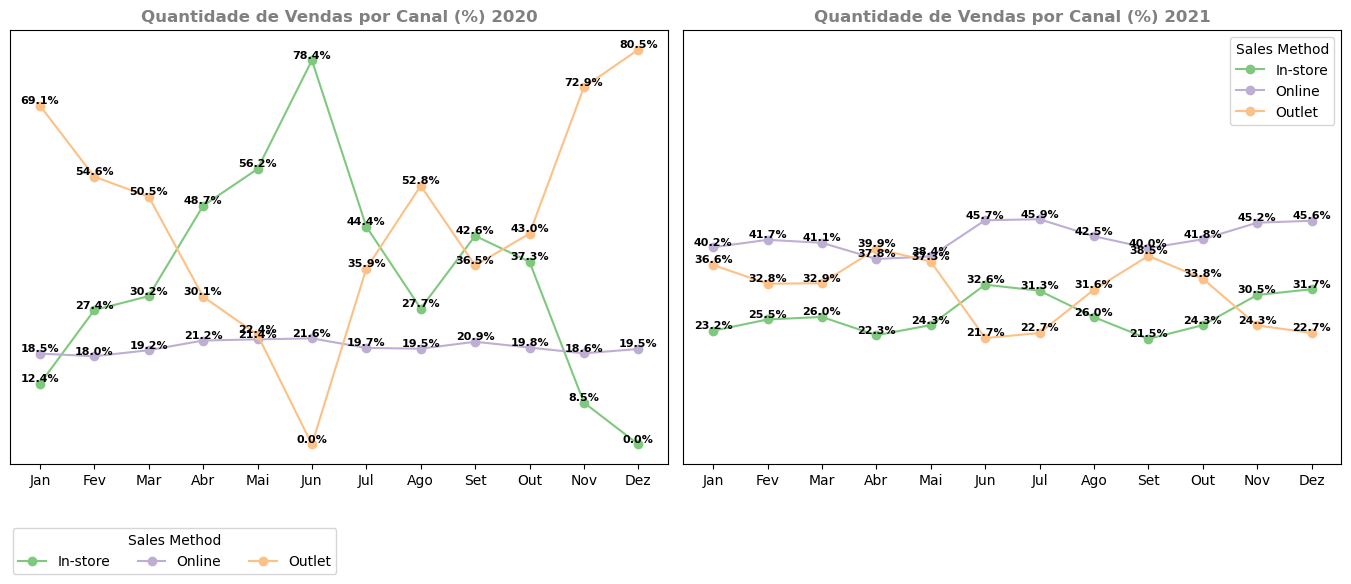

In [62]:
# Filtrar os dados para 2020 e 2021 e agrupar por M√™s e Sales Method
vendas_mensais_canal_2020 = df_adidas[df_adidas['Ano'] == 2020].groupby(['M√™s', 'Sales Method'], observed=False)['Units Sold'].sum().unstack().fillna(0)
vendas_mensais_canal_2021 = df_adidas[df_adidas['Ano'] == 2021].groupby(['M√™s', 'Sales Method'], observed=False)['Units Sold'].sum().unstack().fillna(0)

# Calcular o percentual de vendas por canal para cada m√™s (em rela√ß√£o ao total de vendas de cada m√™s)
vendas_mensais_canal_2020_pct = vendas_mensais_canal_2020.apply(lambda x: (x / x.sum()) * 100, axis=1)
vendas_mensais_canal_2021_pct = vendas_mensais_canal_2021.apply(lambda x: (x / x.sum()) * 100, axis=1)

# Criar a figura e os subgr√°ficos (1 linha, 2 colunas)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Definir as cores para os canais
cores_canais = ['C0', 'C1', 'C2']

# Gr√°fico para 2020 (linha com valores em porcentagem)
for i, canal in enumerate(vendas_mensais_canal_2020_pct.columns):
    axes[0].plot(vendas_mensais_canal_2020_pct.index, vendas_mensais_canal_2020_pct[canal], marker='o', color=cores_canais[i], label=canal)
    for x, y in zip(vendas_mensais_canal_2020_pct.index, vendas_mensais_canal_2020_pct[canal]):
        axes[0].text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

axes[0].set_title('Quantidade de Vendas por Canal (%) 2020', fontsize=12, weight='bold', color="gray")
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_yticks([])  
axes[0].tick_params(left=False)  
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=0)
axes[0].legend(title="Sales Method")
axes[0].grid(False)

# Gr√°fico para 2021 (linha com valores em porcentagem)
for i, canal in enumerate(vendas_mensais_canal_2021_pct.columns):
    axes[1].plot(vendas_mensais_canal_2021_pct.index, vendas_mensais_canal_2021_pct[canal], marker='o', color=cores_canais[i], label=canal)
    for x, y in zip(vendas_mensais_canal_2021_pct.index, vendas_mensais_canal_2021_pct[canal]):
        axes[1].text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

axes[1].set_title('Quantidade de Vendas por Canal (%) 2021', fontsize=12, weight='bold', color="gray")
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_yticks([])  
axes[1].tick_params(left=False)  
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=0)
axes[1].legend(title="Sales Method")
axes[1].grid(False)

# Criar a legenda apenas uma vez, na parte inferior e centralizada
handles, labels = axes[0].get_legend_handles_labels()  # Pega a legenda do gr√°fico de 2020
axes[0].legend(handles, labels, title="Sales Method", loc='center', bbox_to_anchor=(0.25, -0.2), ncol=3) 

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\analise_percentual_canais.png", dpi=200, bbox_inches='tight')

# Ajuste do layout para evitar sobreposi√ß√£o
plt.tight_layout()

# Exibir o gr√°fico
plt.show()

### **C√°lculo da Varia√ß√£o Percentual de Vendas entre 2020 e 2021 por Canal e M√™s**

Nesta etapa, calculei a **varia√ß√£o percentual** de **unidades vendidas** entre os anos de **2020** e **2021** para cada **canal de vendas** (In-store, Online, Outlet) e para cada m√™s. Esse c√°lculo permite entender como as vendas evolu√≠ram ao longo do tempo e comparar o desempenho de diferentes canais de vendas entre os dois anos.

Fica n√≠tido o aumento escalar no canal **online** mas ainda sim, tivemos aumento nos outros 2 canais, s√≥ que com uma varia√ß√£o menor, com excess√£o de alguns meses, exemplo:

- m√™s 1 **(776,74%)** e 12 **(1970,45%)** no In-Store
- m√™s 5 **(879,71%)** no Outlet 

In [63]:
# Filtrar os dados para 2020 e 2021 e agrupar por M√™s e Sales Method
vendas_mensais_canal_2020 = df_adidas[df_adidas['Ano'] == 2020].groupby(['M√™s', 'Sales Method'], observed=False)['Units Sold'].sum().unstack().fillna(0)
vendas_mensais_canal_2021 = df_adidas[df_adidas['Ano'] == 2021].groupby(['M√™s', 'Sales Method'], observed=False)['Units Sold'].sum().unstack().fillna(0)

# Calcular a varia√ß√£o percentual de vendas de 2020 para 2021 para cada canal e m√™s
variacao_percentual = (vendas_mensais_canal_2021 - vendas_mensais_canal_2020) / vendas_mensais_canal_2020 * 100

variacao_percentual_formatado = variacao_percentual.round(2)

print(variacao_percentual_formatado)

Sales Method  In-store   Online  Outlet
M√™s                                    
1               648.54   766.73  111.29
2               296.99   890.46  156.13
3               187.37   615.61  117.49
4                44.63   464.21  318.62
5               129.44   848.28  783.16
6               319.22  2031.69     inf
7               233.11  1002.12  199.05
8               206.39   611.49   95.72
9               111.55   700.07  340.68
10              241.30  1007.27  311.48
11             2018.41  1343.65   97.63
12                 inf  1854.34  135.22


# An√°lise Descritiva (Estat√≠stica)

## **An√°lise de Distribui√ß√£o das Unidades Vendidas**

Nesta etapa, realizei uma an√°lise sobre a **distribui√ß√£o das unidades vendidas**, utilizando um **histograma** para visualizar como as vendas est√£o agrupadas em diferentes faixas. A partir dessa an√°lise, consegui entender melhor a **concentra√ß√£o das vendas** e identificar **padr√µes** no comportamento das unidades vendidas ao longo do tempo.

1. **Defini√ß√£o das Faixas de Unidades Vendidas**:
   Utilizei a fun√ß√£o **`np.histogram_bin_edges()`** para definir as **faixas de valores** (bins) com base no m√©todo de **Sturges**, que calcula automaticamente o n√∫mero ideal de intervalos para representar a distribui√ß√£o. Isso me forneceu **intervalos ajustados** para as unidades vendidas, com a **largura de cada intervalo** sendo calculada e arredondada para garantir uma distribui√ß√£o mais uniforme dos dados.

2. **Histograma com Kernel Density Estimation (KDE)**:
   Criei um **histograma** das unidades vendidas utilizando os **bins definidos** e apliquei um **KDE** para suavizar a distribui√ß√£o e visualizar melhor a **tend√™ncia central**. A linha de **KDE** foi customizada com uma cor diferente, permitindo observar com clareza a **forma da distribui√ß√£o** das unidades vendidas.

3. **Distribui√ß√£o de Frequ√™ncias**:
   Utilizei a fun√ß√£o **`tabela_distribuicao_frequencias()`** para calcular a **frequ√™ncia das unidades vendidas** dentro dos intervalos definidos. Isso me permitiu entender em detalhes como as **unidades vendidas** est√£o distribu√≠das ao longo das faixas, identificando **quais faixas t√™m maior participa√ß√£o** nas vendas totais.

In [64]:
bins_vendas = np.histogram_bin_edges(df_adidas["Units Sold"], bins="sturges")

bins_vendas

array([  0.        ,  55.86666667, 111.73333333, 167.6       ,
       223.46666667, 279.33333333, 335.2       , 391.06666667,
       446.93333333, 502.8       , 558.66666667, 614.53333333,
       670.4       , 726.26666667, 782.13333333, 838.        ])

In [65]:
tamanho_intervalo = bins_vendas[1:] - bins_vendas[:-1]
tamanho_intervalo_inteiro = np.zeros(len(bins_vendas))
tamanho_intervalo_inteiro[1:] = np.ceil(tamanho_intervalo)

bins_arredondados_vendas = bins_vendas[0] + np.cumsum(tamanho_intervalo_inteiro)

bins_arredondados_vendas

array([  0.,  56., 112., 168., 224., 280., 336., 392., 448., 504., 560.,
       616., 672., 728., 784., 840.])

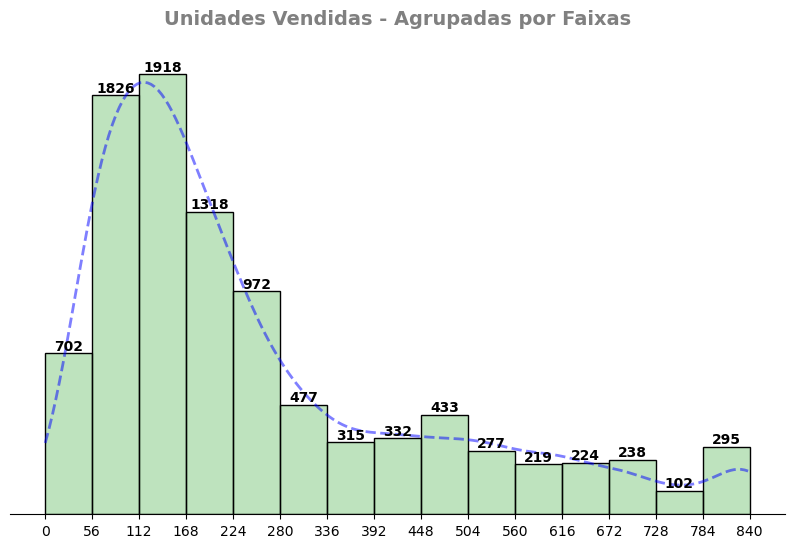

In [66]:
plt.figure(figsize=(10, 6))

# Criando o histograma com KDE
h = sns.histplot(
    data=df_adidas, 
    x="Units Sold", 
    bins=bins_arredondados_vendas, 
    color="C0", 
    kde=True
)

# Mudando a cor do KDE ap√≥s o gr√°fico ser criado
h.lines[0].set_color('blue')
h.lines[0].set_linestyle('--')
h.lines[0].set_linewidth(2)
h.lines[0].set_alpha(0.5)

# Adicionando r√≥tulos nas barras
for barra in h.containers:
    h.bar_label(barra, color="black", fontweight="bold", fontsize=10)

# Customizando o gr√°fico
h.set_xticks(bins_arredondados_vendas)
h.set_ylabel('')
h.set_xlabel('')
h.set_yticks([])

# Removendo o box (spines) do gr√°fico
h.spines['top'].set_visible(False)
h.spines['right'].set_visible(False)
h.spines['left'].set_visible(False)

h.set_title('Unidades Vendidas - Agrupadas por Faixas', fontsize=14, weight='bold', pad=20, color='gray')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\histograma_unidades_vendidas.png", dpi=200, bbox_inches='tight')

plt.show()

### **C√°lculo de Skewness (Assimetria)**:
O valor de **skewness** (1.23) revela que a distribui√ß√£o das **unidades vendidas** tem uma **cauda √† direita**, o que significa que a maior parte das vendas est√° concentrada em intervalos **mais baixos**, mas com alguns picos de vendas muito **altos**. Esse tipo de assimetria indica que a maioria dos produtos foi vendida em **quantidades menores**, enquanto alguns poucos produtos se destacaram com vendas significativamente mais altas. No nosso caso, esse comportamento √© importante porque indica que, apesar de uma **grande quantidade de produtos vendidos**, h√° um pequeno n√∫mero de **produtos de alto desempenho** que impactaram consideravelmente o total de vendas, o que pode ser vital para **estrat√©gias de marketing e estoque**.

### **C√°lculo de Kurtosis (Curtose)**:
A **curtose** (0.74) calculada sugere que a distribui√ß√£o das **unidades vendidas** apresenta um **pico mais acentuado**, o que significa que a maior parte das vendas est√° concentrada nos **intervalos iniciais** (ou seja, nos **valores mais baixos de unidades vendidas**), com uma **diminui√ß√£o acentuada** conforme as vendas aumentam. Isso implica que a maioria dos produtos vendeu **quantidades moderadas ou pequenas**, mas com **alguns poucos produtos** registrando grandes vendas. Em termos estrat√©gicos, esse padr√£o pode indicar que o estoque de produtos com **baixas unidades vendidas** precisa ser **ajustado**, enquanto os produtos com **alto volume de vendas** devem receber mais aten√ß√£o em termos de **produ√ß√£o e marketing**.

In [67]:
df_adidas["Units Sold"].skew()

1.2671750854466552

In [68]:
df_adidas["Units Sold"].kurtosis()

0.7303898458435754

In [69]:
df_adidas["Units Sold Interval"] = pd.cut(
    df_adidas["Units Sold"],
    bins=bins_arredondados_vendas, 
    right=False
)

df_adidas

3                Retailer     Region         State          City  \
Invoice Date                                                       
2020-01-01    Foot Locker  Northeast      New York      New York   
2020-01-01    Foot Locker  Northeast  Pennsylvania  Philadelphia   
2020-01-01    Foot Locker  Northeast  Pennsylvania  Philadelphia   
2020-01-01    Foot Locker  Northeast      New York      New York   
2020-01-01    Foot Locker  Northeast      New York      New York   
...                   ...        ...           ...           ...   
2021-12-31    Foot Locker  Northeast  Pennsylvania  Philadelphia   
2021-12-31    Foot Locker  Northeast  Pennsylvania  Philadelphia   
2021-12-31    Foot Locker  Northeast  Pennsylvania  Philadelphia   
2021-12-31         Amazon  Northeast         Maine      Portland   
2021-12-31         Amazon  Northeast         Maine      Portland   

3                           Product  Price per Unit  Units Sold  Total Sales  \
Invoice Date                                                                   
2020-01-01    Men's Street Footwear              50       838.0     441491.0   
2020-01-01          Women's Apparel              70       275.0     206250.0   
2020-01-01          Women's Apparel              53        83.0       4399.0   
2020-01-01    Men's Street Footwear              47       336.0      15792.0   
2020-01-01    Men's Street Footwear              34       384.0      13056.0   
...                             ...             ...         ...          ...   
2021-12-31            Men's Apparel              70       175.0     122500.0   
2021-12-31            Men's Apparel              63        47.0       2961.0   
2021-12-31            Men's Apparel              46        56.0       2576.0   
2021-12-31            Men's Apparel              52        36.0       1872.0   
2021-12-31            Men's Apparel              54       125.0      68749.0   

3             Operating Profit  Operating Margin Sales Method  \
Invoice Date                                                    
2020-01-01            152344.0              0.50     In-store   
2020-01-01             61875.0              0.30       Outlet   
2020-01-01              1407.0              0.32       Outlet   
2020-01-01              9633.0              0.60       Online   
2020-01-01              6789.0              0.52       Outlet   
...                        ...               ...          ...   
2021-12-31             42875.0              0.35       Outlet   
2021-12-31              1362.0              0.46       Online   
2021-12-31              1004.0              0.39       Outlet   
2021-12-31               692.0              0.37       Online   
2021-12-31             17187.0              0.25       Outlet   

3             Log_Total_Sales  Log_Units_Sold  Log_Operating_Profit  \
Invoice Date                                                          
2020-01-01           1.599706        1.743453              1.633285   
2020-01-01           1.238504        0.492703              1.137322   
2020-01-01          -0.811603       -1.045706             -1.001684   
2020-01-01          -0.130650        0.750939              0.085713   
2020-01-01          -0.232019        0.923146             -0.112101   
...                       ...             ...                   ...   
2021-12-31           0.960906       -0.089144              0.929910   
2021-12-31          -1.022470       -1.769420             -1.020050   
2021-12-31          -1.096662       -1.547177             -1.192337   
2021-12-31          -1.266684       -1.769420             -1.388812   
2021-12-31           0.653114       -0.521345              0.413049   

3             Log_Operating_Margin  Log_Price_per_Unit   Ano  M√™s  \
Invoice Date                                                        
2020-01-01                0.872145            0.484677  2020    1   
2020-01-01               -1.376855            1.567958  2020    1   
2020-01-01               -1

In [70]:
df_adidas_vendas_freq = tabela_distribuicao_frequencias(df_adidas, "Units Sold Interval")

df_adidas_vendas_freq

frequencia  frequencia_relativa  frequencia_acumulada  \
Units Sold Interval                                                          
[0.0, 56.0)                 702             0.072761                   702   
[56.0, 112.0)              1826             0.189262                  2528   
[112.0, 168.0)             1918             0.198798                  4446   
[168.0, 224.0)             1318             0.136609                  5764   
[224.0, 280.0)              972             0.100746                  6736   
[280.0, 336.0)              477             0.049440                  7213   
[336.0, 392.0)              315             0.032649                  7528   
[392.0, 448.0)              332             0.034411                  7860   
[448.0, 504.0)              433             0.044880                  8293   
[504.0, 560.0)              277             0.028711                  8570   
[560.0, 616.0)              219             0.022699                  8789   
[616.0, 672.0)              224             0.023217                  9013   
[672.0, 728.0)              238             0.024668                  9251   
[728.0, 784.0)              102             0.010572                  9353   
[784.0, 840.0)              295             0.030576                  9648   

                     frequencia_relativa_acumulada  
Units Sold Interval                                 
[0.0, 56.0)                               0.072761  
[56.0, 112.0)                             0.262023  
[112.0, 168.0)                            0.460821  
[168.0, 224.0)                            0.597430  
[224.0, 280.0)                            0.698176  
[280.0, 336.0)                            0.747616  
[336.0, 392.0)                            0.780265  
[392.0, 448.0)                            0.814677  
[448.0, 504.0)                            0.859556  
[504.0, 560.0)                            0.888267  
[560.0, 616.0)                            0.910966  
[616.0, 672.0)                            0.934183  
[672.0, 728.0)                            0.958852  
[728.0, 784.0)                            0.969424  
[784.0, 840.0)                            1.000000

### An√°lise de Regress√£o Linear: Unidades Vendidas e Outras Vari√°veis

Foram realizadas regress√µes lineares para entender a rela√ß√£o entre **unidades vendidas** e outras vari√°veis financeiras. A seguir, os principais resultados:

#### 1. Unidades Vendidas vs Pre√ßo por Unidade
- **Correla√ß√£o fraca** (r = 0.25), indicando pouca rela√ß√£o entre as vari√°veis.
- **R¬≤ = 6.26%**, ou seja, as unidades vendidas explicam pouco da varia√ß√£o no pre√ßo.
- **p-value muito baixo**, sugerindo que a rela√ß√£o √© estatisticamente significativa, mas sem grande impacto pr√°tico.

#### 2. Unidades Vendidas vs Vendas Totais
- **Correla√ß√£o forte** (r = 0.91), mostrando uma rela√ß√£o direta entre volume de vendas e faturamento.
- **R¬≤ = 83.69%**, indicando que a maior parte da varia√ß√£o das vendas totais √© explicada pelas unidades vendidas.
- **p-value = 0**, confirmando a relev√¢ncia estat√≠stica da rela√ß√£o.

#### 3. Unidades Vendidas vs Lucro Operacional
- **Correla√ß√£o forte** (r = 0.91), mostrando que o aumento no volume de vendas impacta diretamente o lucro operacional.
- **R¬≤ = 82.82%**, sugerindo que a varia√ß√£o no lucro est√° altamente relacionada ao n√∫mero de unidades vendidas.
- **p-value = 0**, refor√ßando a signific√¢ncia da rela√ß√£o.

#### 4. Unidades Vendidas vs Margem Operacional
- **Correla√ß√£o negativa fraca** (r = -0.31), sugerindo que maiores volumes de vendas podem reduzir ligeiramente a margem operacional.
- **R¬≤ = 9.73%**, indicando que outros fatores influenciam a margem al√©m do volume vendido.
- **p-value muito baixo**, estatisticamente relevante, mas com impacto limitado.

### Conclus√£o
- **Vendas totais e lucro operacional** t√™m uma **rela√ß√£o forte** com o n√∫mero de unidades vendidas.
- **Pre√ßo por unidade e margem operacional** apresentam **correla√ß√µes mais fracas**, sugerindo que **fatores externos** influenciam essas vari√°veis.
- Os insights ajudam na **defini√ß√£o de pre√ßos, estrat√©gias de vendas e planejamento financeiro** da empresa.

In [71]:
# Definir as colunas num√©ricas para an√°lise
colunas_analise = [
    "Price per Unit", "Operating Margin"
]

# Criar um dicion√°rio para armazenar os resultados das regress√µes
resultados_regressao = {}

# Avaliar a rela√ß√£o de 'Units Sold' com as outras colunas num√©ricas
for coluna in colunas_analise:
        resultado_regressao = linregress(df_adidas["Units Sold"], df_adidas[coluna])
        
        # Armazenar os resultados no dicion√°rio
        resultados_regressao[coluna] = {
            'r_value': resultado_regressao.rvalue,
            'p_value': resultado_regressao.pvalue,
            'r_squared': resultado_regressao.rvalue ** 2,
            'stderr': resultado_regressao.stderr,
            'intercept_stderr': resultado_regressao.intercept_stderr
        }
    
# Exibir os resultados da regress√£o
for coluna, resultado in resultados_regressao.items():
    print(f"An√°lise de regress√£o entre 'Units Sold' e '{coluna}':")
    print(f"  Coeficiente de correla√ß√£o (r-value): {resultado['r_value']:.4f}")
    print(f"  Coeficiente de determina√ß√£o (R¬≤): {resultado['r_squared']:.4f}")
    print(f"  p-value: {resultado['p_value']:.4e}")
    print(f"  Erro padr√£o da inclina√ß√£o (stderr): {resultado['stderr']:.4e}")
    print(f"  Erro padr√£o do intercepto (intercept_stderr): {resultado['intercept_stderr']:.4e}")
    print()

An√°lise de regress√£o entre 'Units Sold' e 'Price per Unit':
  Coeficiente de correla√ß√£o (r-value): 0.2606
  Coeficiente de determina√ß√£o (R¬≤): 0.0679
  p-value: 1.6949e-149
  Erro padr√£o da inclina√ß√£o (stderr): 6.3446e-04
  Erro padr√£o do intercepto (intercept_stderr): 2.0655e-01

An√°lise de regress√£o entre 'Units Sold' e 'Operating Margin':
  Coeficiente de correla√ß√£o (r-value): -0.3160
  Coeficiente de determina√ß√£o (R¬≤): 0.0998
  p-value: 1.3241e-222
  Erro padr√£o da inclina√ß√£o (stderr): 4.2753e-06
  Erro padr√£o do intercepto (intercept_stderr): 1.3918e-03



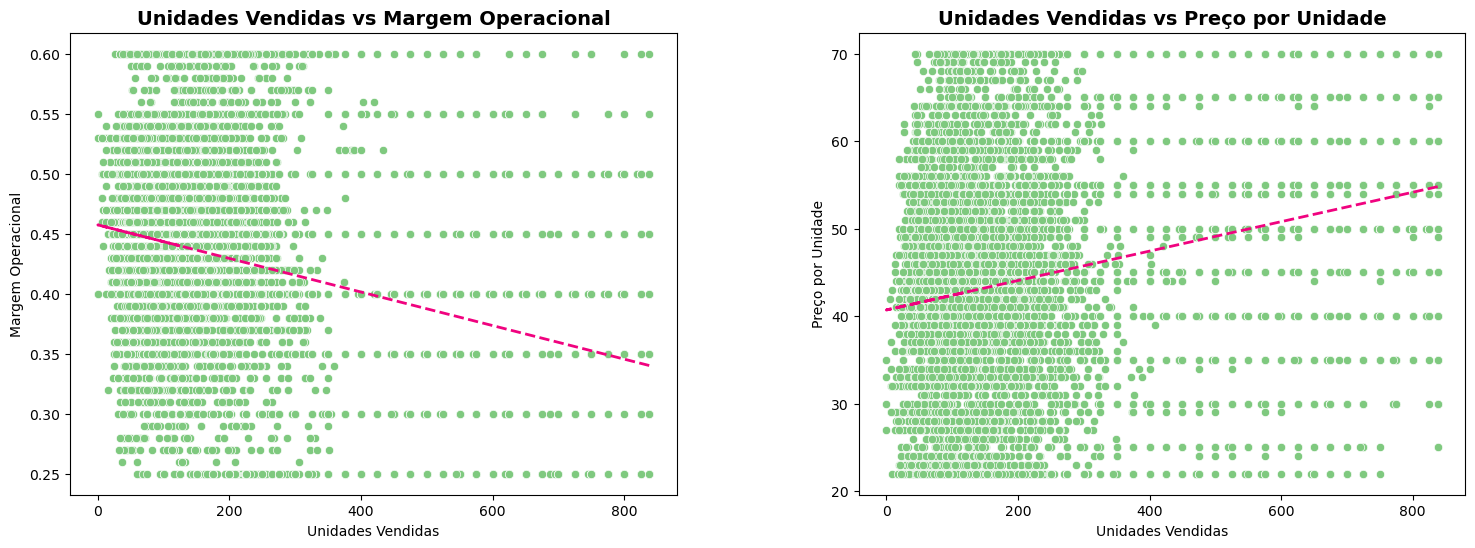

In [72]:
# Criar o mosaico para exibir os gr√°ficos (2 linhas, 2 colunas)
mosaico = "AB"
fig = plt.figure(figsize=(18, 6))
espacamento = {'wspace': 0.3, 'hspace': 0.4}
axs = fig.subplot_mosaic(mosaico, gridspec_kw=espacamento)

# Gr√°fico 1: Units Sold vs Operating Margin
sns.scatterplot(data=df_adidas, x="Units Sold", y="Operating Margin", ax=axs['A'])
axs['A'].set_title("Unidades Vendidas vs Margem Operacional", fontsize=14, weight='bold')
axs['A'].set_xlabel("Unidades Vendidas")
axs['A'].set_ylabel("Margem Operacional")

# Calcular e adicionar a linha de regress√£o para o gr√°fico 'A'
resultado_regressao = linregress(df_adidas["Units Sold"], df_adidas["Operating Margin"])
axs['A'].plot(
    df_adidas["Units Sold"], 
    resultado_regressao.intercept + resultado_regressao.slope * df_adidas["Units Sold"], 
    color="C5", linestyle="--", linewidth=2
)

# Gr√°fico 2: Units Sold vs Pre√ßo por Unidade
sns.scatterplot(data=df_adidas, x="Units Sold", y="Price per Unit", ax=axs['B'])
axs['B'].set_title("Unidades Vendidas vs Pre√ßo por Unidade", fontsize=14, weight='bold')
axs['B'].set_xlabel("Unidades Vendidas")
axs['B'].set_ylabel("Pre√ßo por Unidade")

# Calcular e adicionar a linha de regress√£o para o gr√°fico 'B'
resultado_regressao = linregress(df_adidas["Units Sold"], df_adidas["Price per Unit"])
axs['B'].plot(
    df_adidas["Units Sold"], 
    resultado_regressao.intercept + resultado_regressao.slope * df_adidas["Units Sold"], 
    color="C5", linestyle="--", linewidth=2
)

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\regressao_linear.png", dpi=200, bbox_inches='tight')

plt.show()

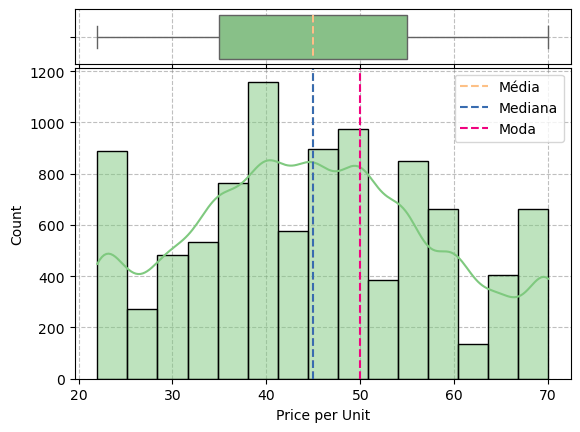

In [73]:
composicao_histograma_boxplot(df_adidas, "Price per Unit")

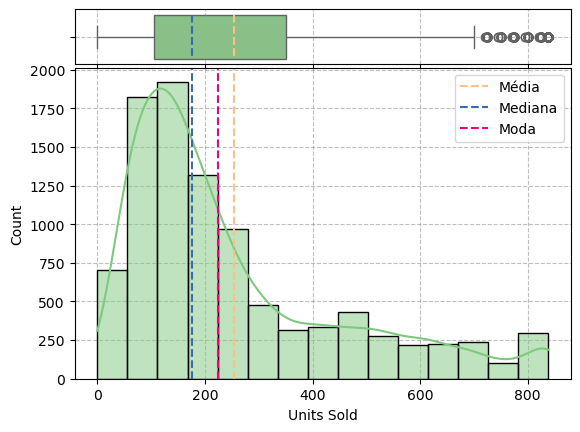

In [74]:
composicao_histograma_boxplot(df_adidas, "Units Sold")

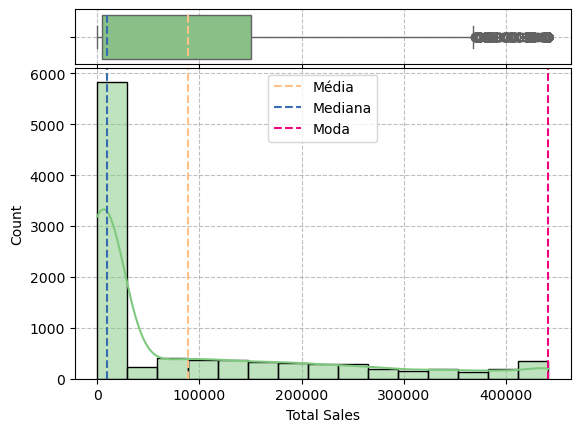

In [75]:
composicao_histograma_boxplot(df_adidas, "Total Sales")

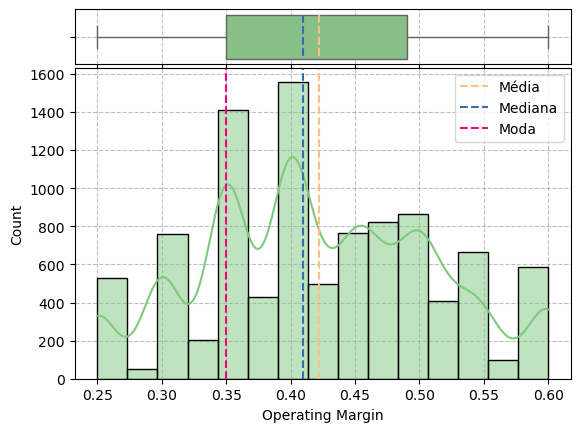

In [76]:
composicao_histograma_boxplot(df_adidas, "Operating Margin")